<a href="https://colab.research.google.com/github/roopa24-sri/Data_Analyst-Portfolio/blob/main/SMART_CAR_PARKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /content


In [ ]:
drc_empty = cwd + '/**/Empty/*.jpg'
empty_files = glob.glob(drc_empty, recursive=True)
len(empty_files)

1689

In [ ]:
y = ['Empty'] * int(len(empty_files))


In [ ]:
drc_occupied = cwd + '/**/Occupied/*.jpg'
occupied_files = glob.glob(drc_occupied, recursive=True)
len(occupied_files)

2269

In [ ]:
y = y + ( ['Occupied'] * int(len(occupied_files)))


In [ ]:
file_names = empty_files + occupied_files  ## Contains the full path


In [ ]:
df = pd.DataFrame(data={'filename' : file_names , 'target': y})
df = shuffle(df)
df.index = range(df.shape[0])
df

,filename,target
0,/content/drive/MyDrive/PKLot/Occupied/2012-09-...,Occupied
1,/content/drive/MyDrive/PKLot/Empty/2012-09-19_...,Empty
2,/content/drive/MyDrive/PKLot/Occupied/2012-10-...,Occupied
3,/content/drive/MyDrive/PKLot/Occupied/2012-09-...,Occupied
4,/content/drive/MyDrive/PKLot/Occupied/2012-10-...,Occupied
...,...,...
3953,/content/drive/MyDrive/PKLot/Occupied/2012-10-...,Occupied
3954,/content/drive/MyDrive/PKLot/Empty/2012-10-16_...,Empty
3955,/content/drive/MyDrive/PKLot/Occupied/2012-09-...,Occupied
3956,/content/drive/MyDrive/PKLot/Occupied/2012-09-...,Occupied


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)


In [ ]:
train_generator = datagen.flow_from_dataframe(dataframe=df, directory=None,
                                             x_col='filename',
                                             y_col='target',
                                             target_size=(64,64),
                                             class_mode='binary',
                                             batch_size=100,
                                             shuffle=True,
                                             subset='training',
                                             seed=7)

validation_generator = datagen.flow_from_dataframe(dataframe=df, directory=None,
                                             x_col='filename',
                                             y_col='target',
                                             target_size=(64,64),
                                             class_mode='binary',
                                             shuffle=False,
                                             batch_size=100,
                                             subset='validation',
                                             seed=7)

Found 3167 validated image filenames belonging to 2 classes.
Found 791 validated image filenames belonging to 2 classes.


In [ ]:
images , labels = train_generator[0]


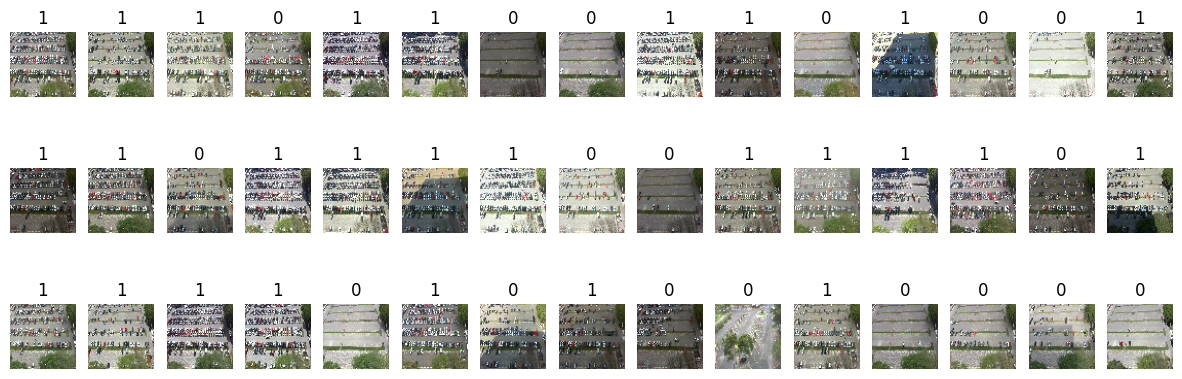

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(45):
    ax = plt.subplot(3, 15, i + 1)
    plt.imshow(images[i])
    plt.title(int(labels[i]))
    plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

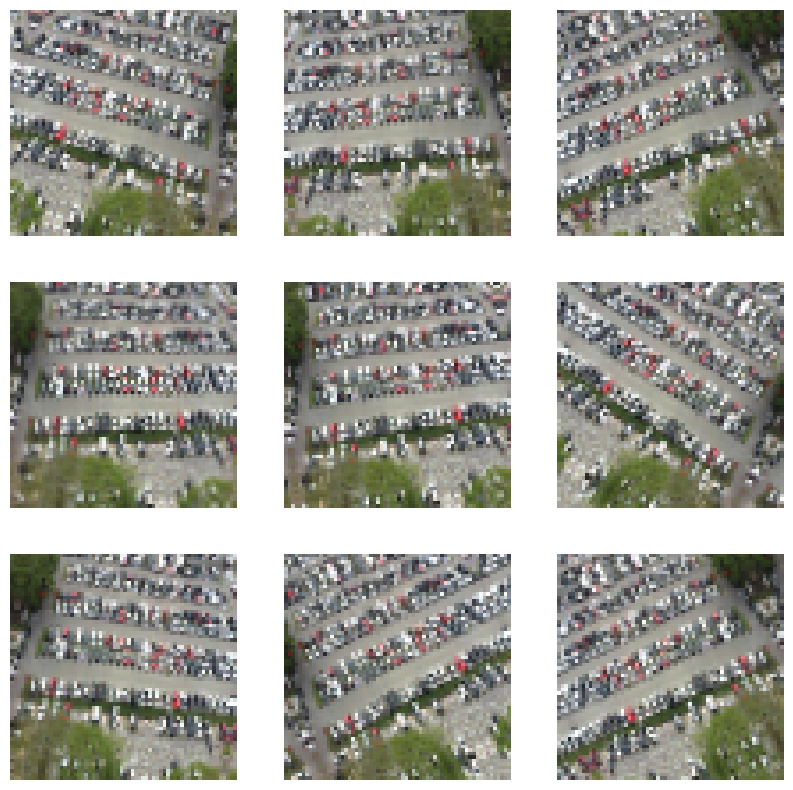

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(images[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images)
    plt.axis("off")

In [ ]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)               

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=cnn.fit(train_generator, validation_data = validation_generator, epochs=5)

Epoch 1/5
32/32 [==============================] - 454s 14s/step - loss: 0.6749 - accuracy: 0.5829 - val_loss: 0.4310 - val_accuracy: 0.8609
Epoch 2/5
32/32 [==============================] - 83s 3s/step - loss: 0.3296 - accuracy: 0.8664 - val_loss: 0.2248 - val_accuracy: 0.9102
Epoch 3/5
32/32 [==============================] - 83s 3s/step - loss: 0.2113 - accuracy: 0.9100 - val_loss: 0.2216 - val_accuracy: 0.8963
Epoch 4/5
32/32 [==============================] - 85s 3s/step - loss: 0.1611 - accuracy: 0.9356 - val_loss: 0.1596 - val_accuracy: 0.9343
Epoch 5/5
32/32 [==============================] - 83s 3s/step - loss: 0.1225 - accuracy: 0.9567 - val_loss: 0.1354 - val_accuracy: 0.9494


In [ ]:
cnn.save('/content/drive/MyDrive/savedmodelpath/model1.h5')

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [ ]:
cnn.evaluate(validation_generator,
steps=STEP_SIZE_VALID)

7/7 [==============================] - 11s 2s/step - loss: 0.1281 - accuracy: 0.9500


[0.12811200320720673, 0.949999988079071]

In [ ]:
y_predicted = cnn.predict(validation_generator)


8/8 [==============================] - 13s 2s/step


In [ ]:
from tensorflow import keras

# Define the ANN model
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(64, 64, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

# Print the summary of the ANN model
ann.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                786496    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 786626 (3.00 MB)
Trainable params: 786626 (3.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = ann.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
32/32 [==============================] - 72s 2s/step - loss: 1.9992 - accuracy: 0.5071 - val_loss: 0.6939 - val_accuracy: 0.4298
Epoch 2/5
32/32 [==============================] - 69s 2s/step - loss: 0.6934 - accuracy: 0.4721 - val_loss: 0.6925 - val_accuracy: 0.5702
Epoch 3/5
32/32 [==============================] - 68s 2s/step - loss: 0.6916 - accuracy: 0.5740 - val_loss: 0.6908 - val_accuracy: 0.5702
Epoch 4/5
32/32 [==============================] - 68s 2s/step - loss: 0.6898 - accuracy: 0.5740 - val_loss: 0.6893 - val_accuracy: 0.5702
Epoch 5/5
32/32 [==============================] - 68s 2s/step - loss: 0.6883 - accuracy: 0.5740 - val_loss: 0.6879 - val_accuracy: 0.5702


In [ ]:
ann.save('/content/drive/MyDrive/savedmodelpath/model2.h5')

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [ ]:
ann.evaluate(validation_generator,
steps=STEP_SIZE_VALID)

7/7 [==============================] - 11s 2s/step - loss: 0.6874 - accuracy: 0.5757


[0.6874328851699829, 0.5757142901420593]

In [ ]:
y_predicted = ann.predict(validation_generator)

8/8 [==============================] - 12s 1s/step


In [ ]:
pred = [ numpy.argmax(i) for i in y_predicted]
pred[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
cm = tf.math.confusion_matrix(labels = validation_generator.classes , predictions = pred)

Text(90.72222222222221, 0.5, 'Truth')

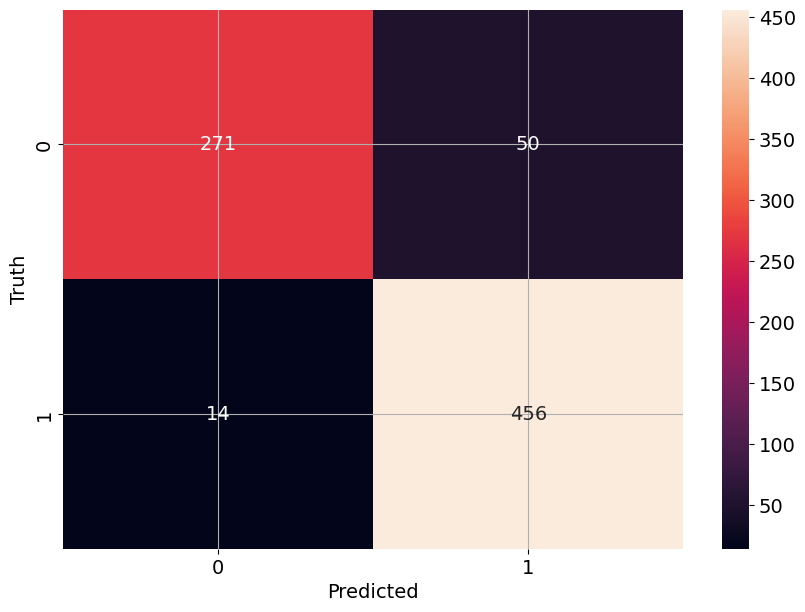

In [ ]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

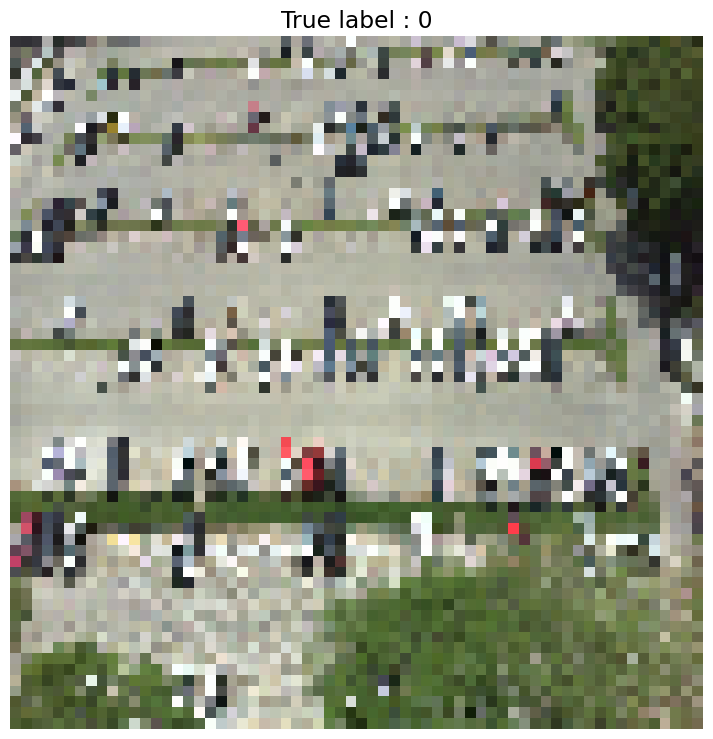

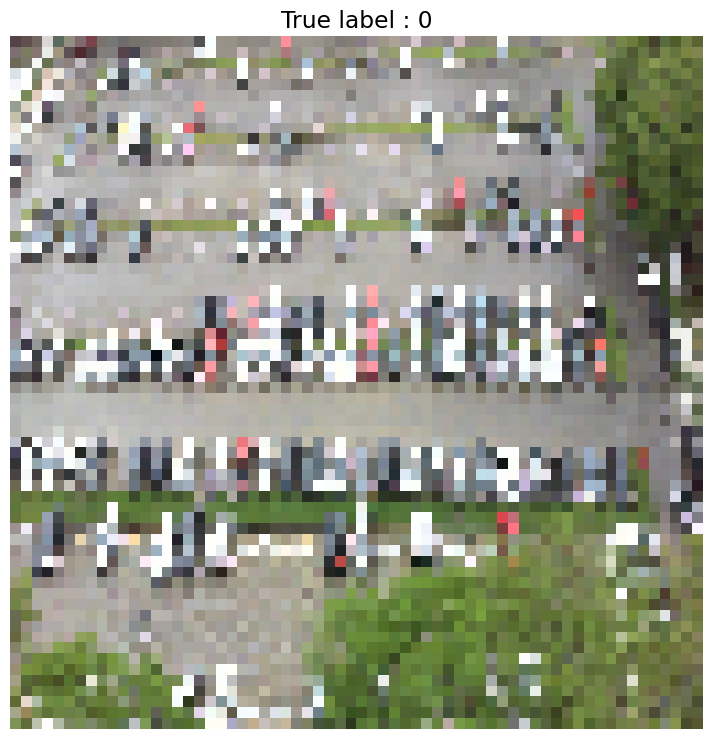

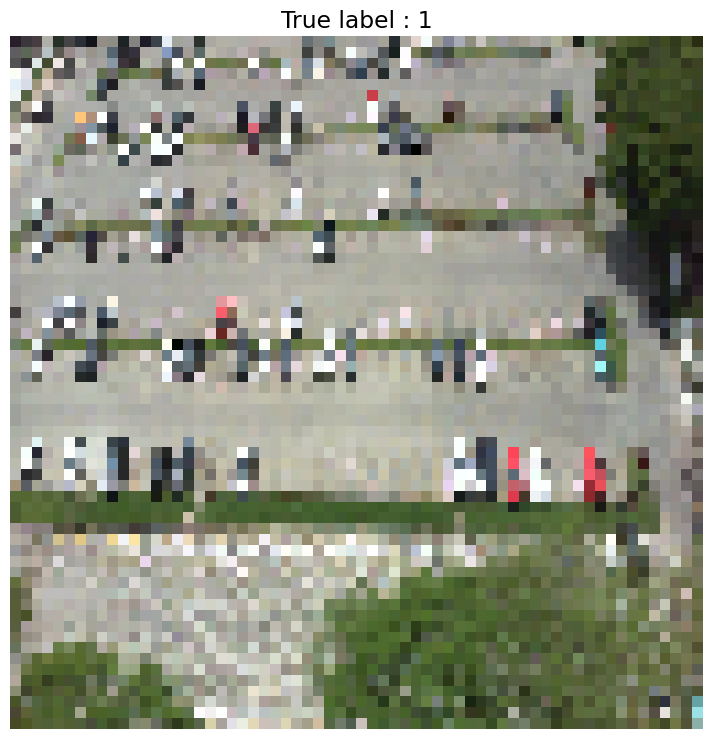

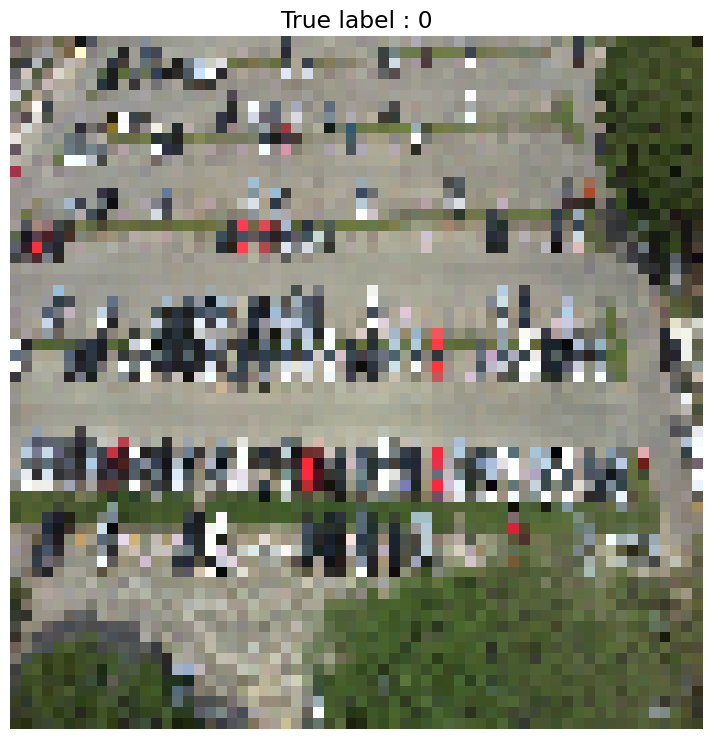

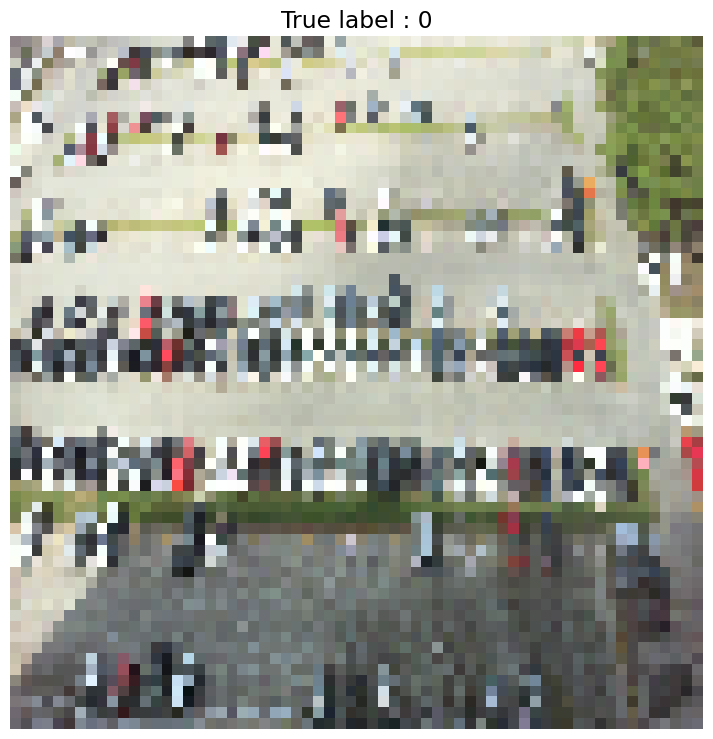

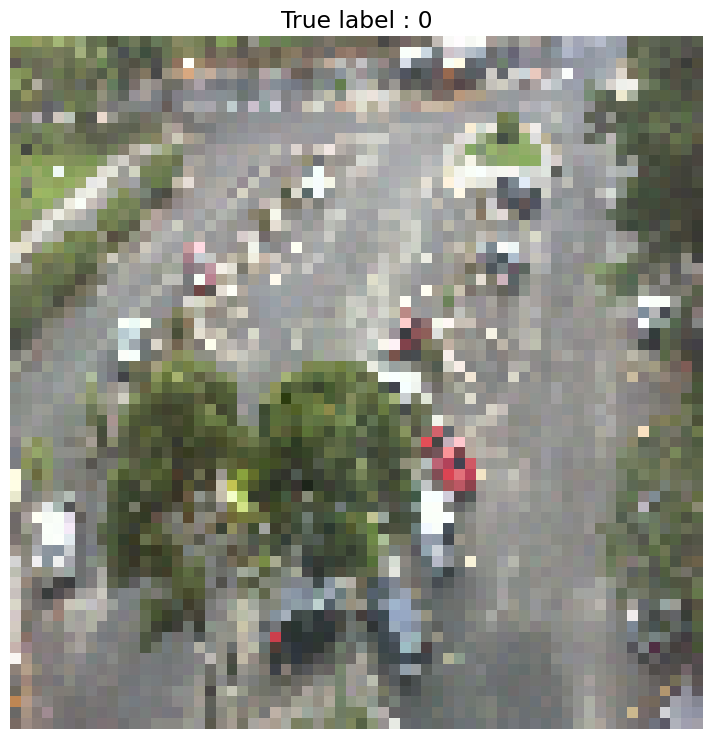

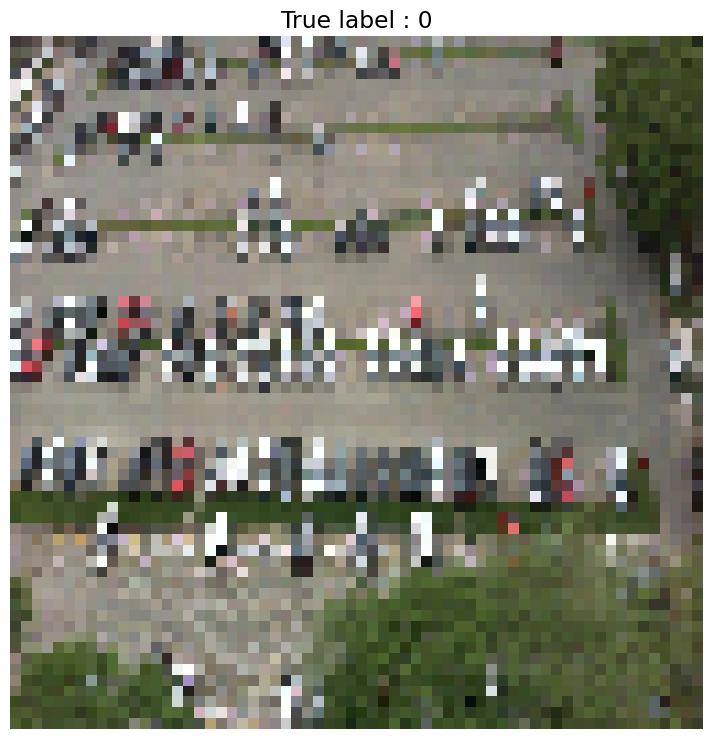

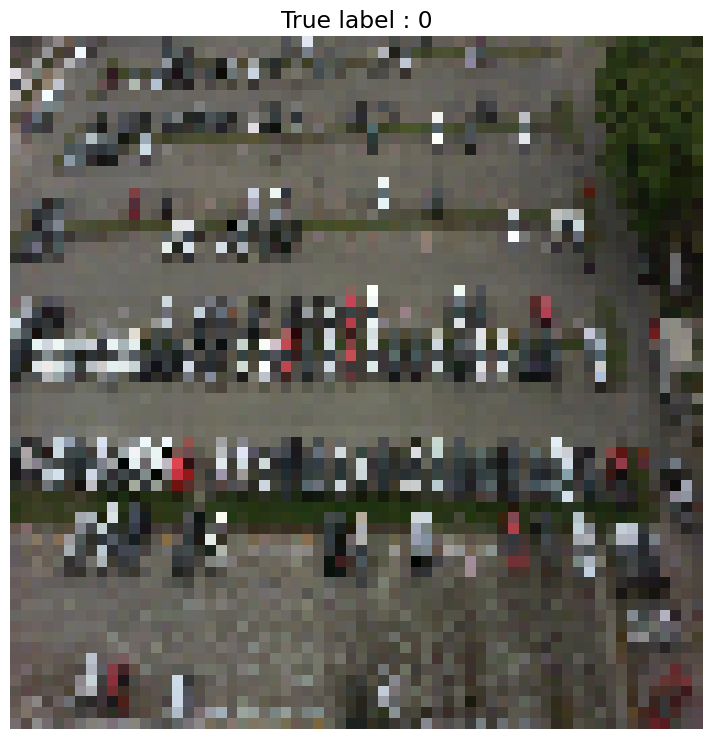

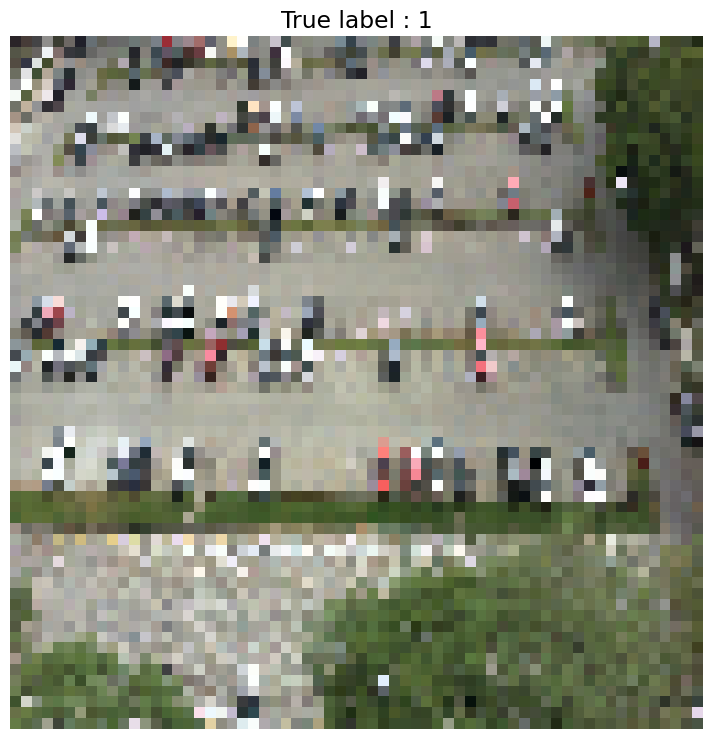

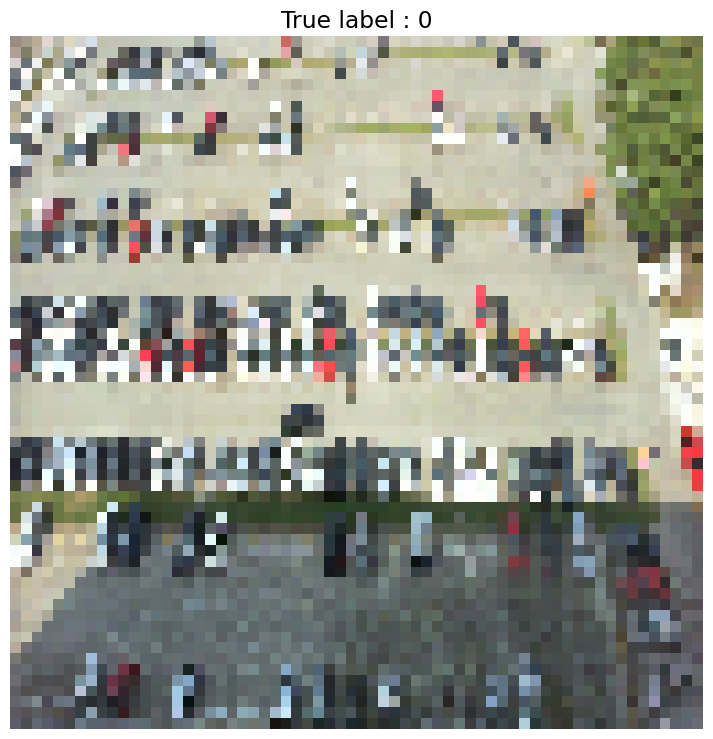

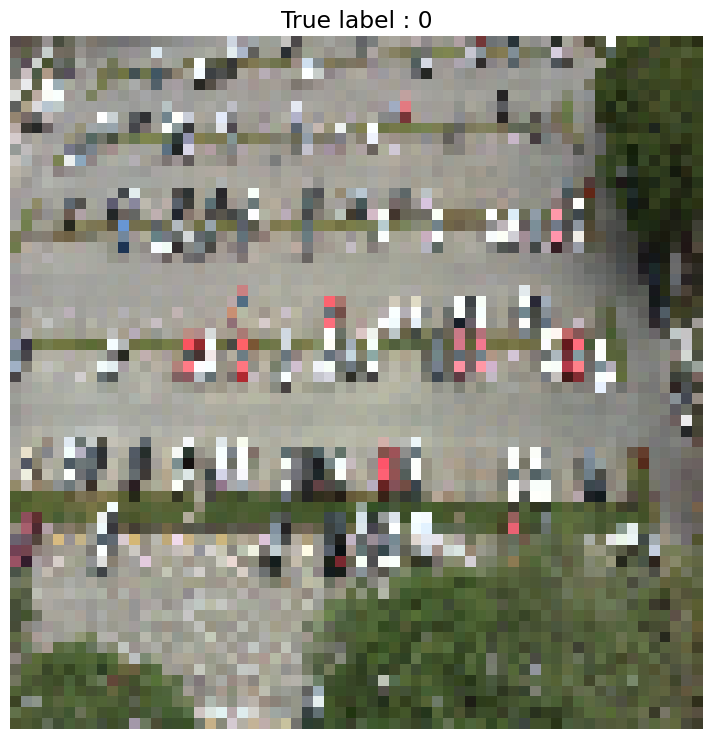

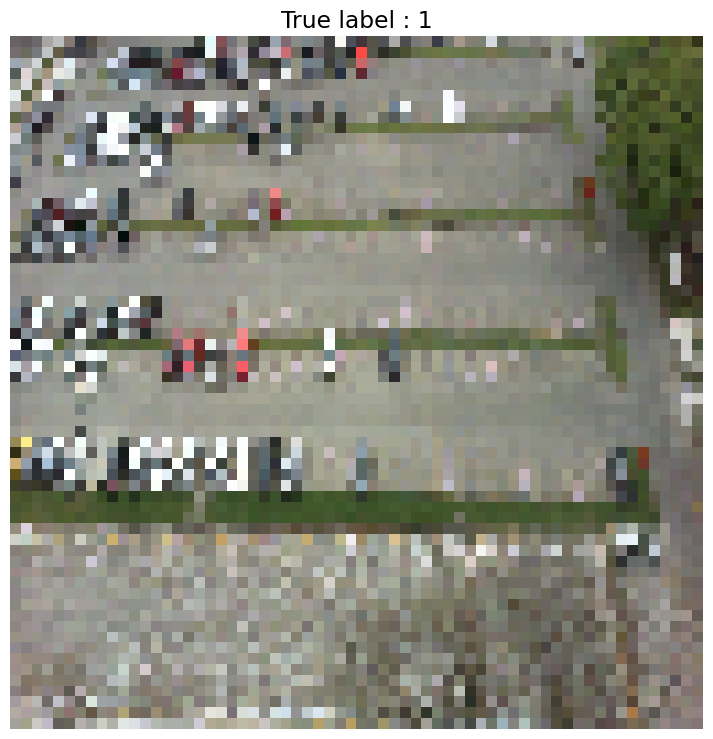

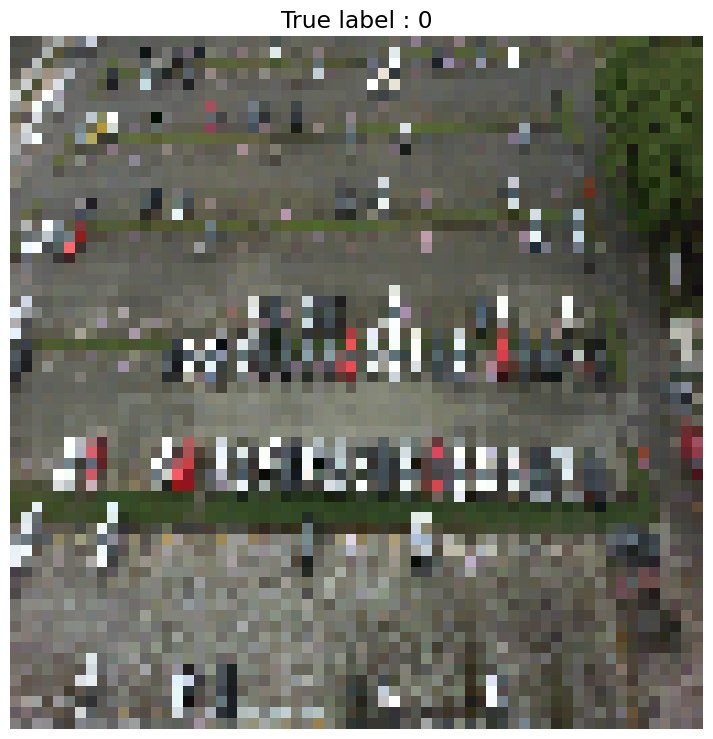

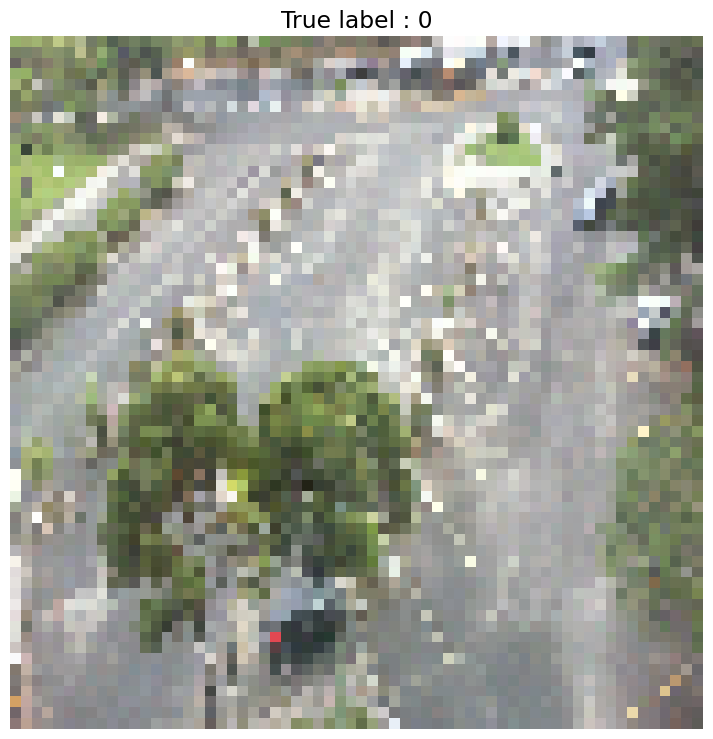

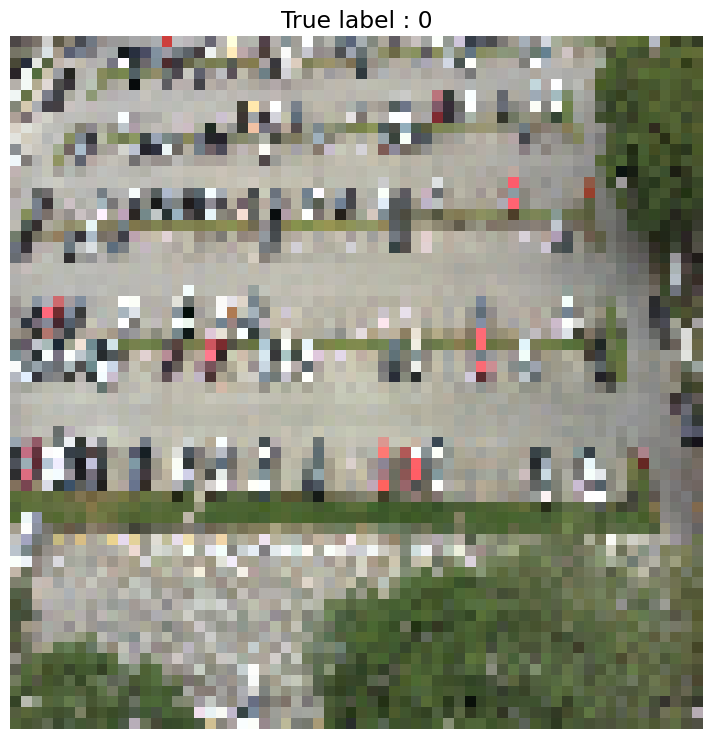

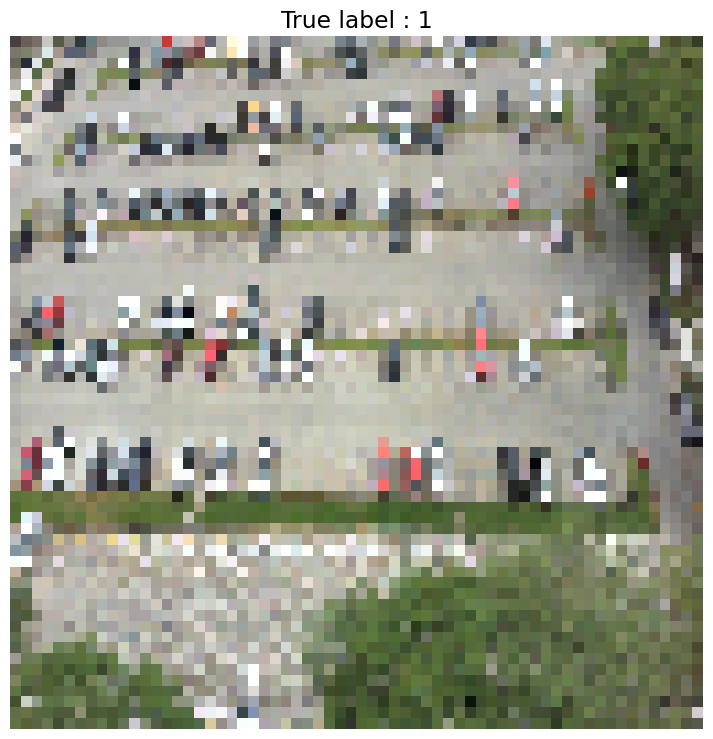

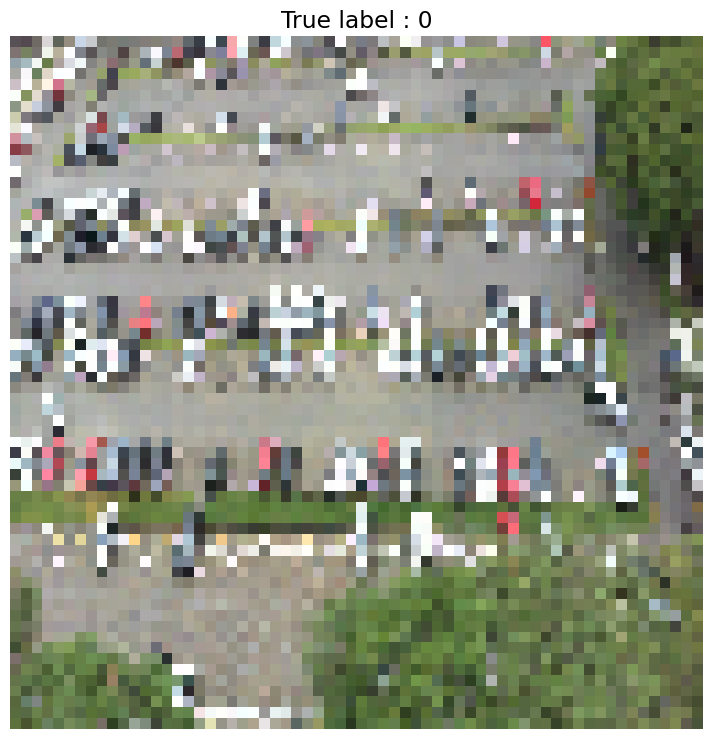

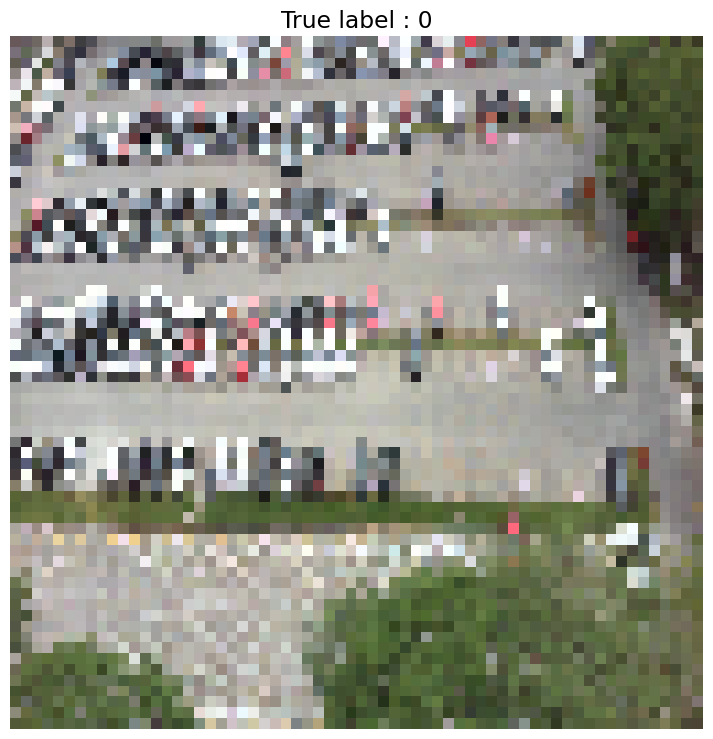

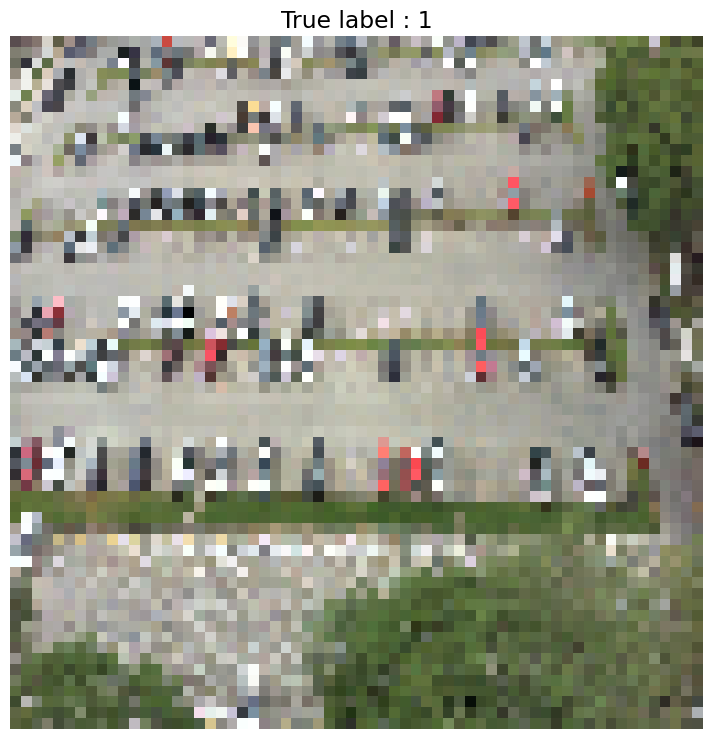

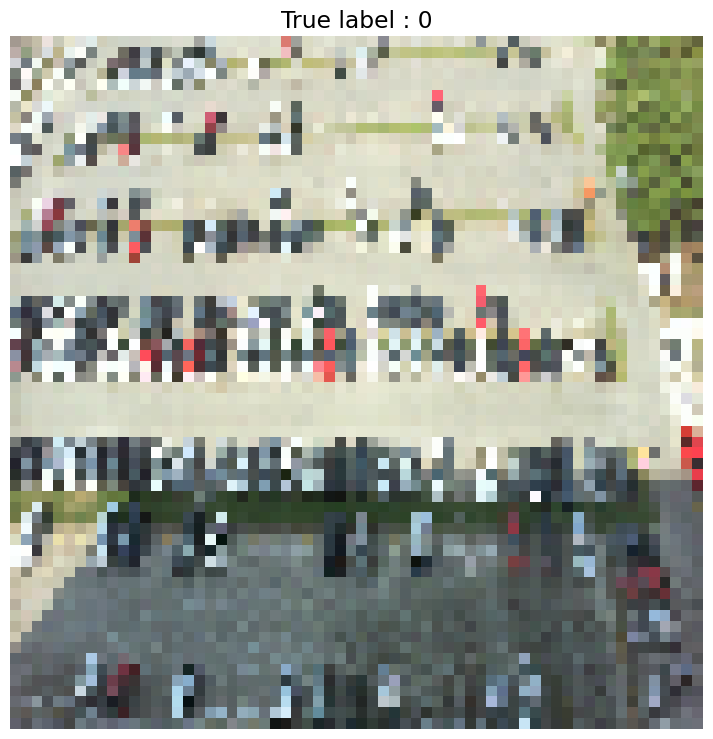

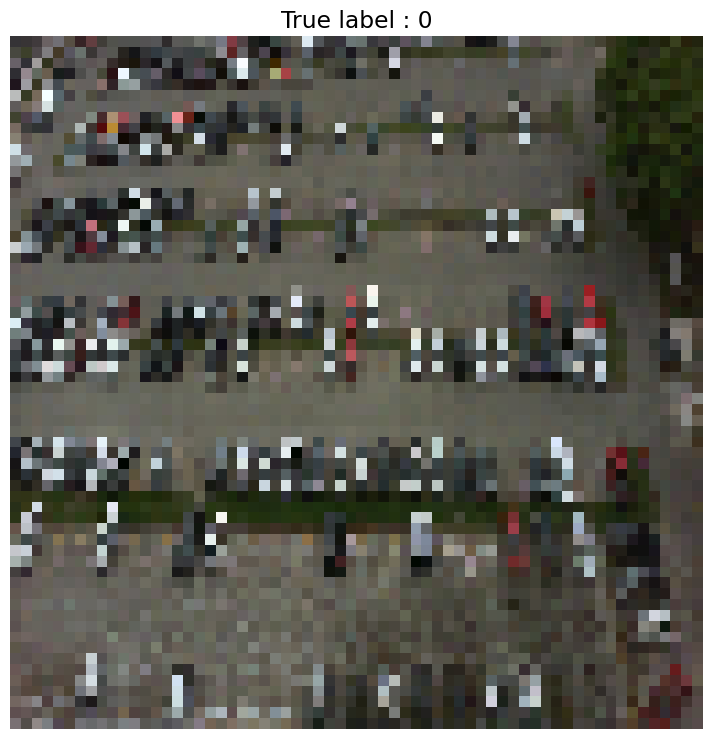

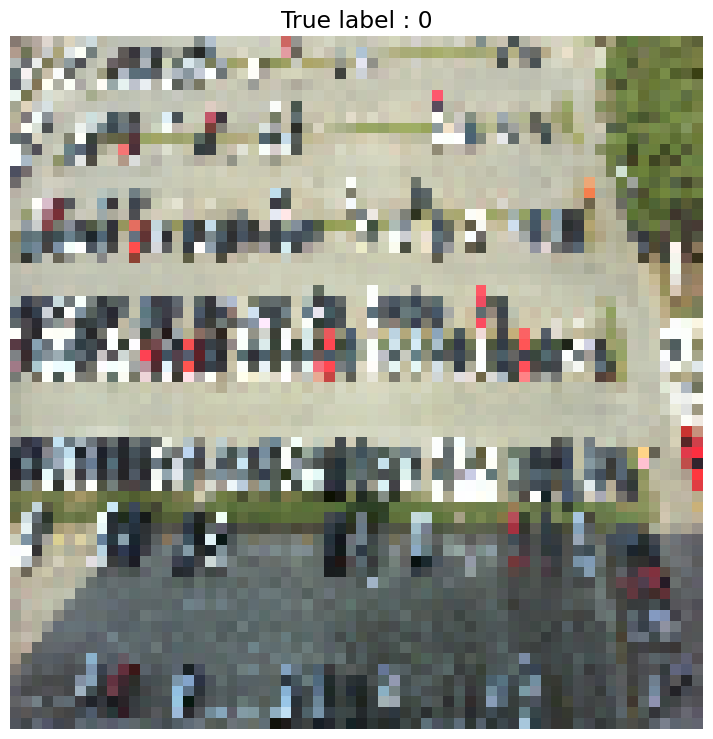

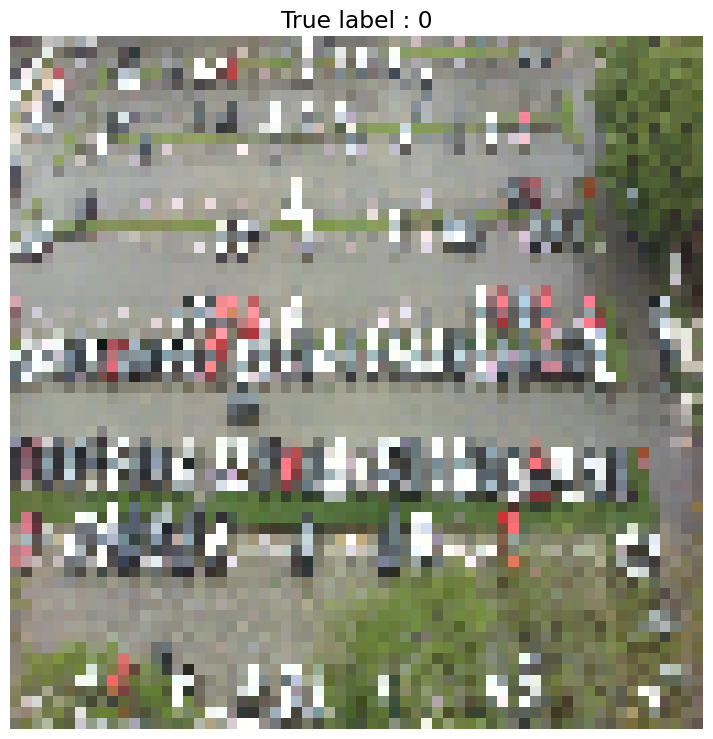

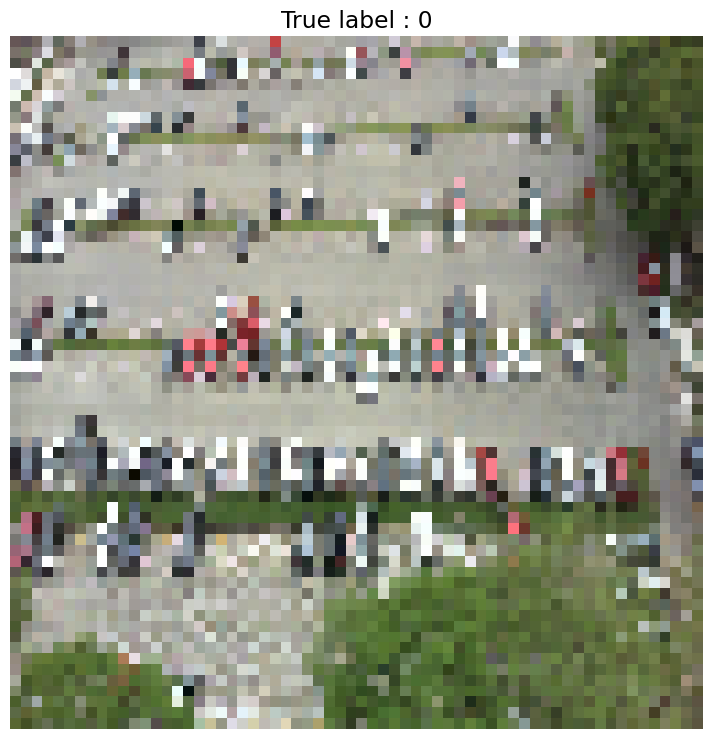

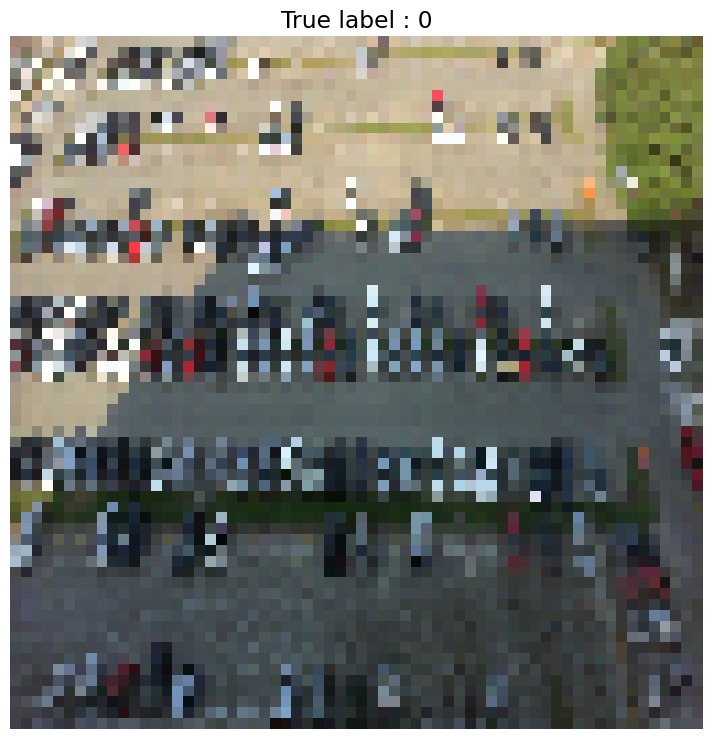

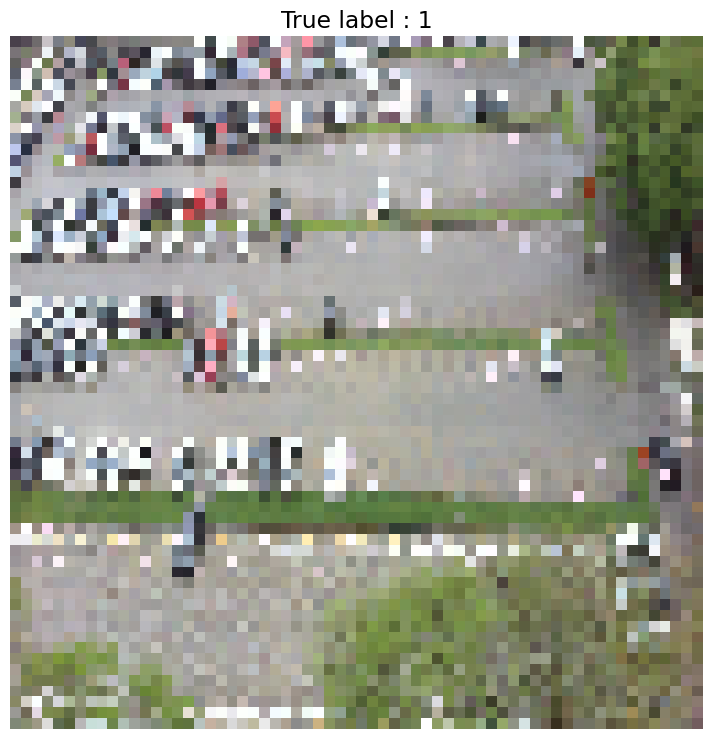

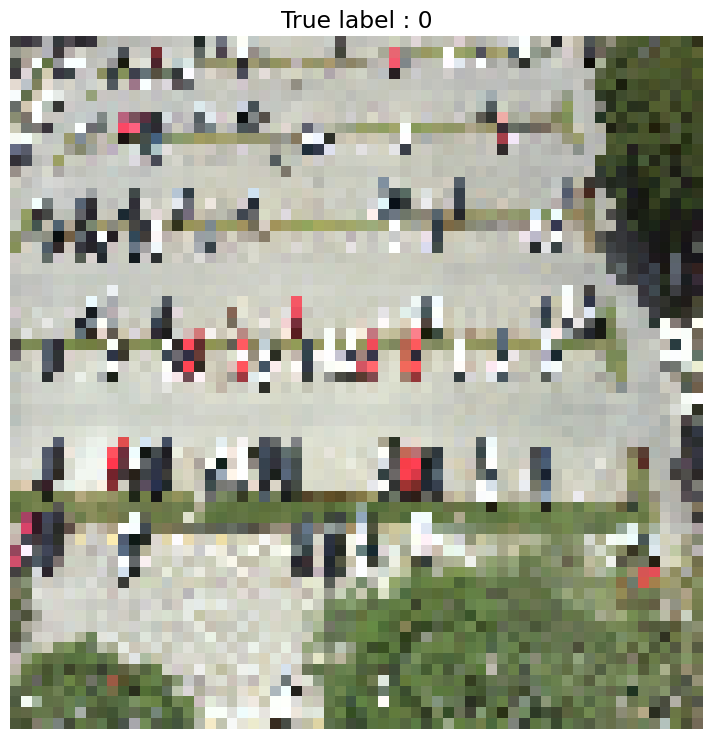

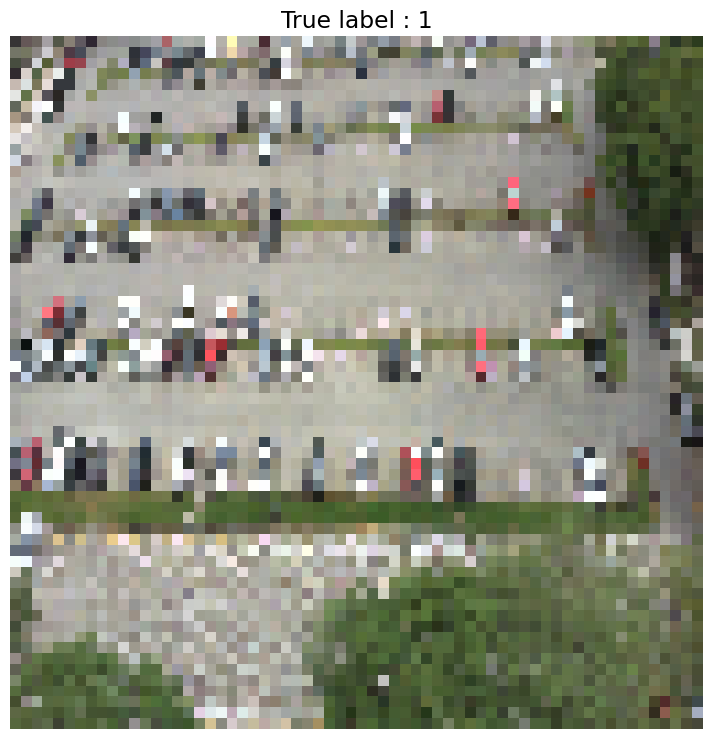

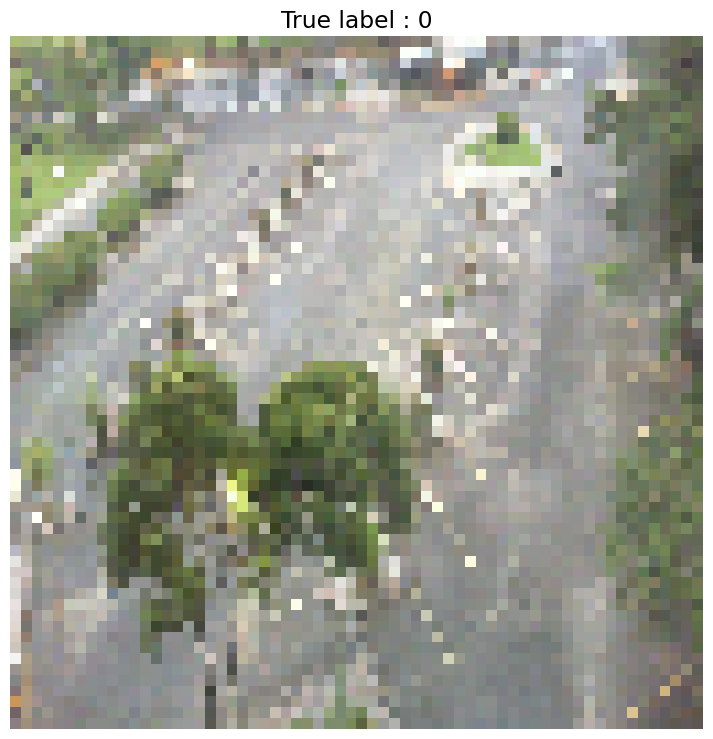

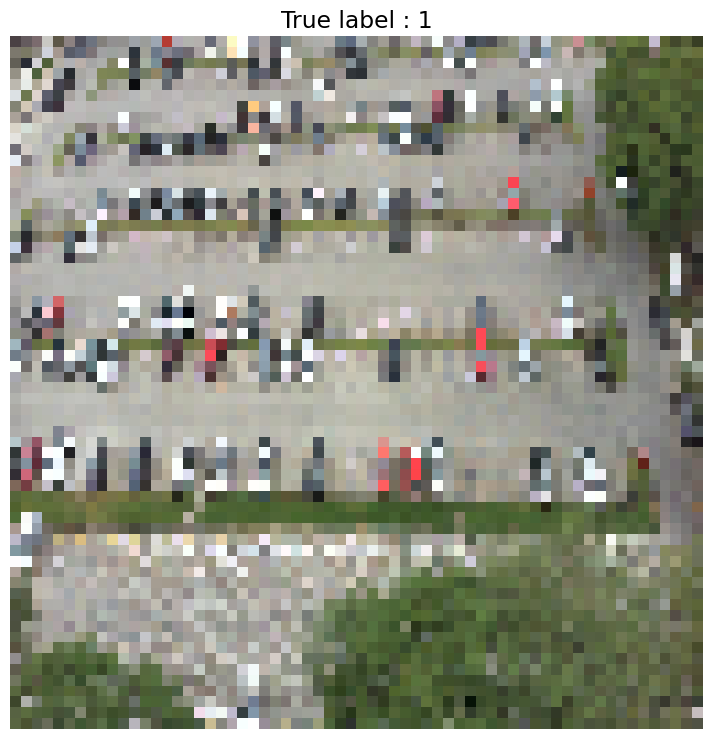

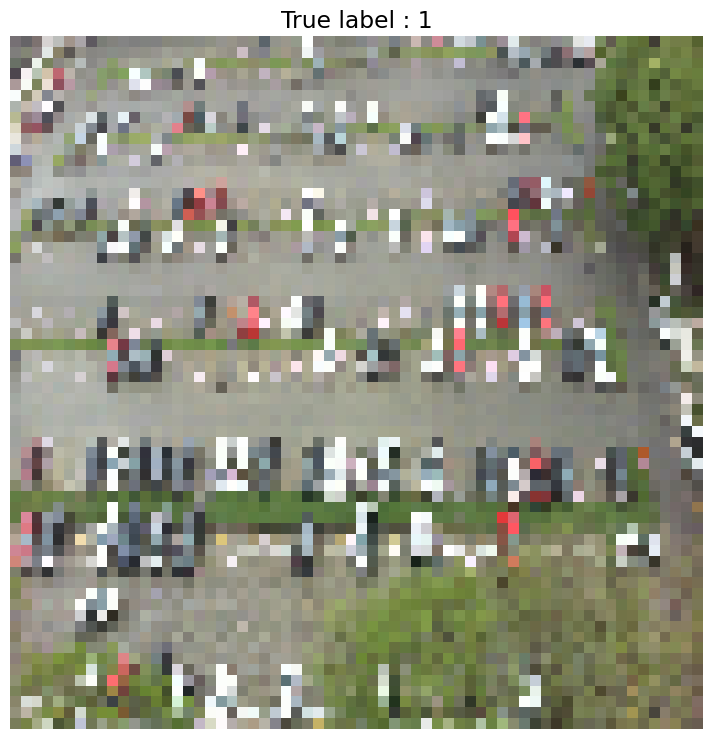

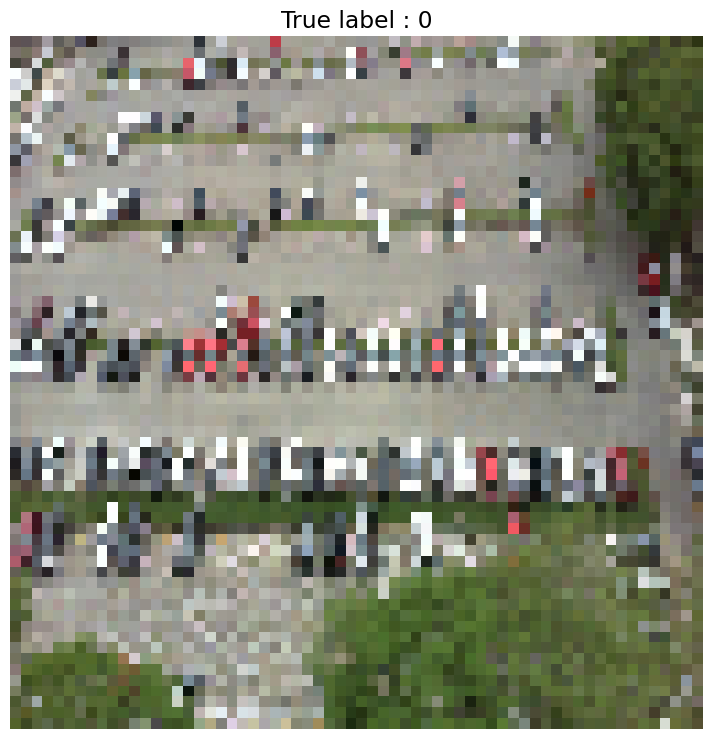

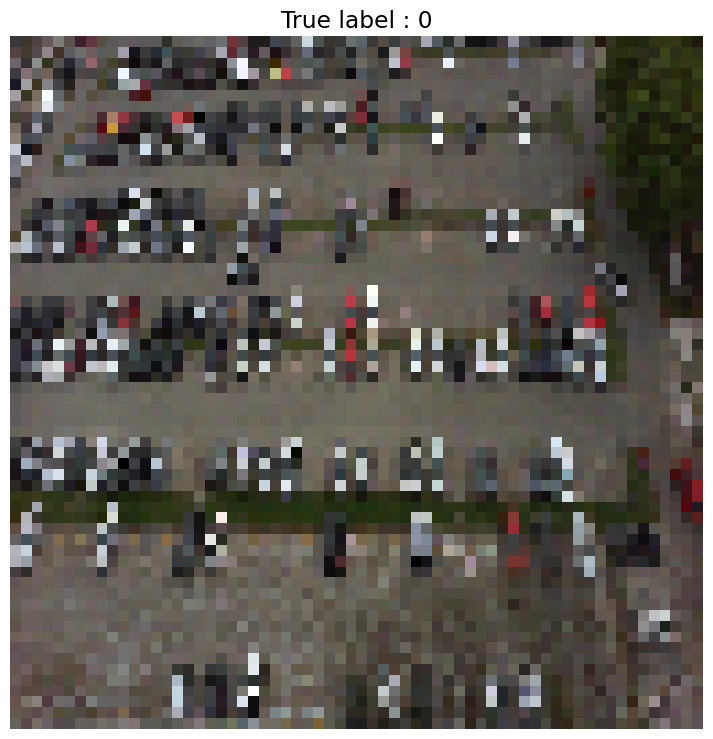

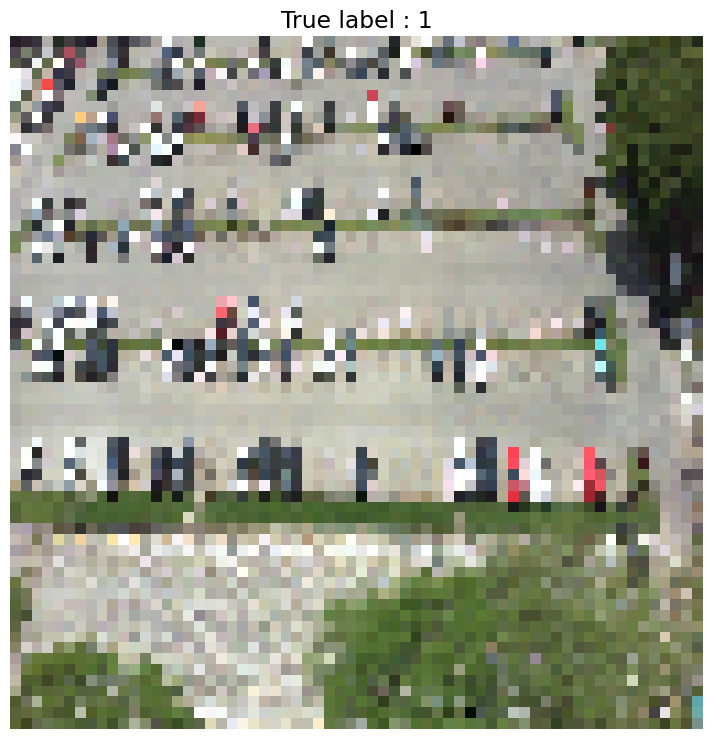

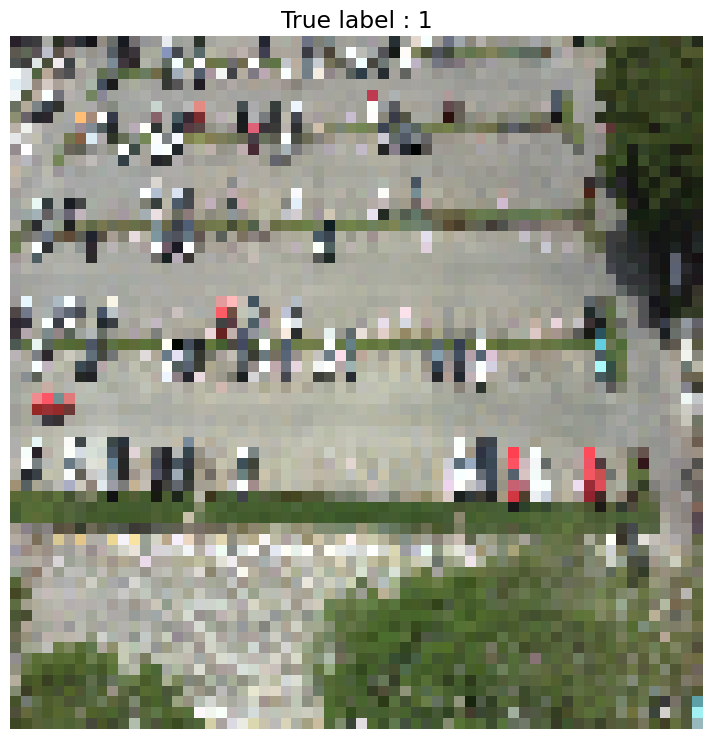

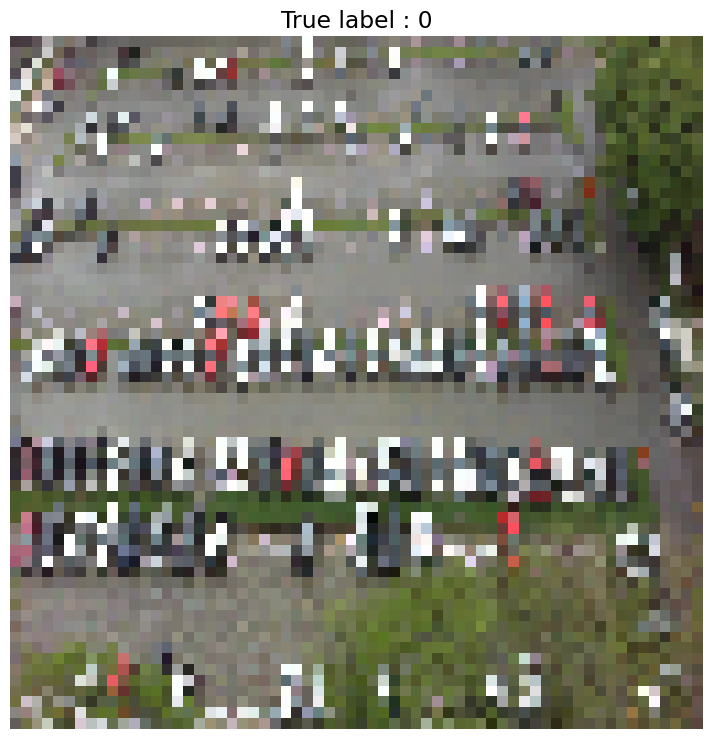

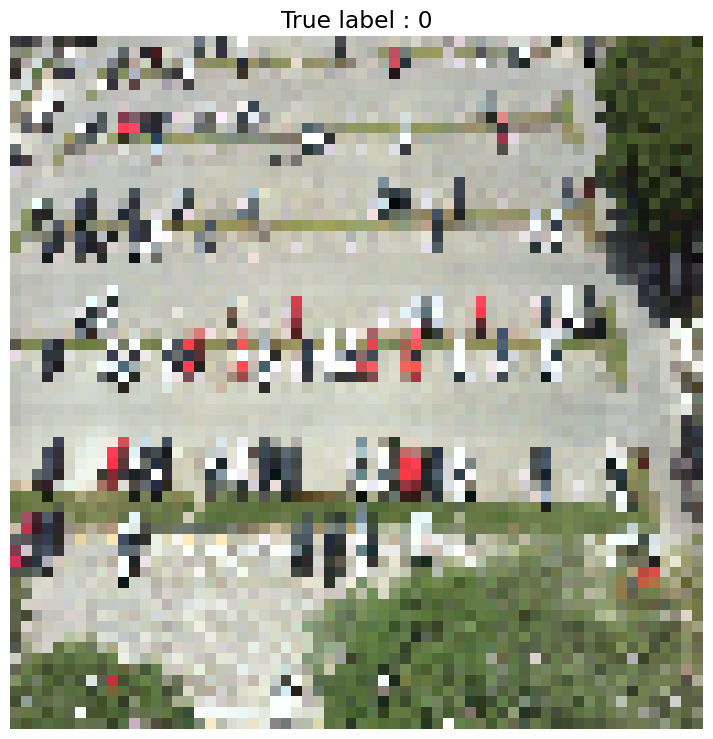

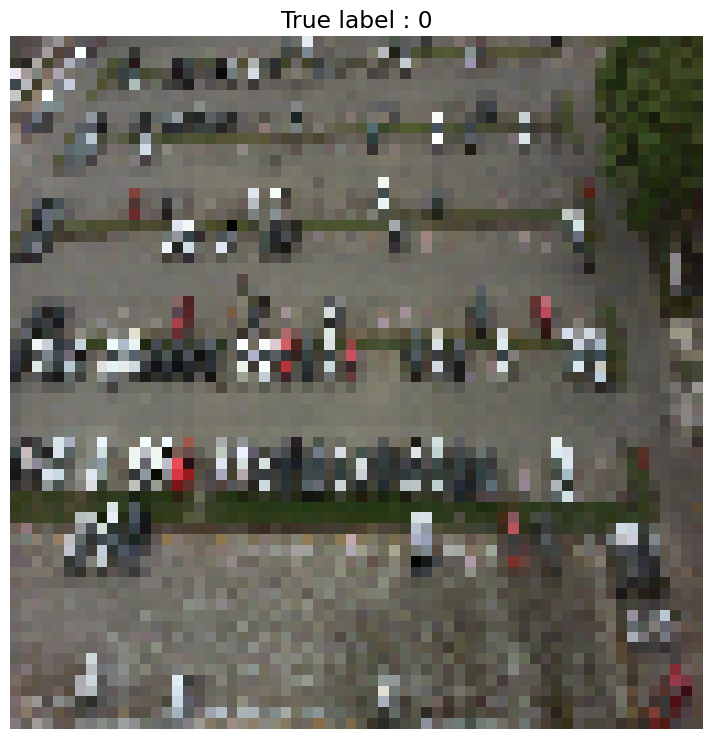

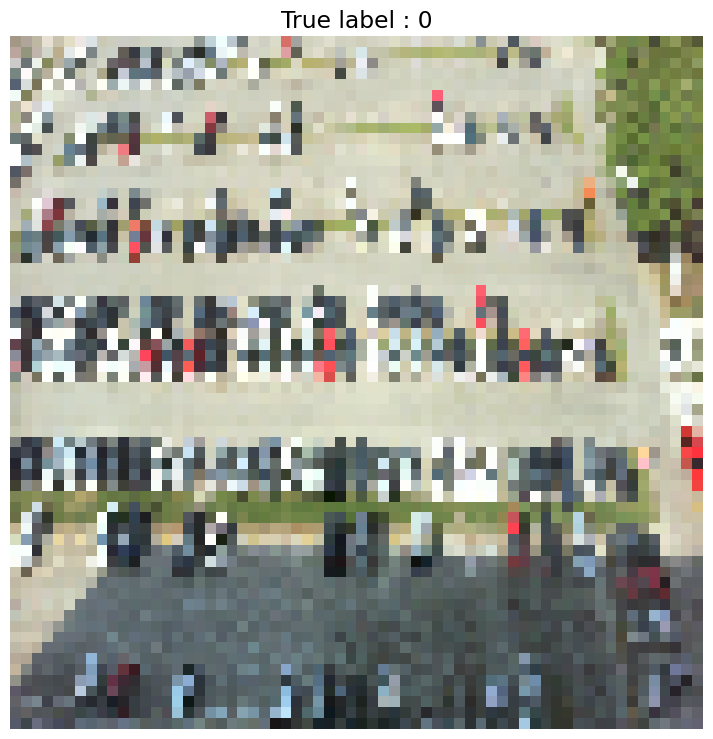

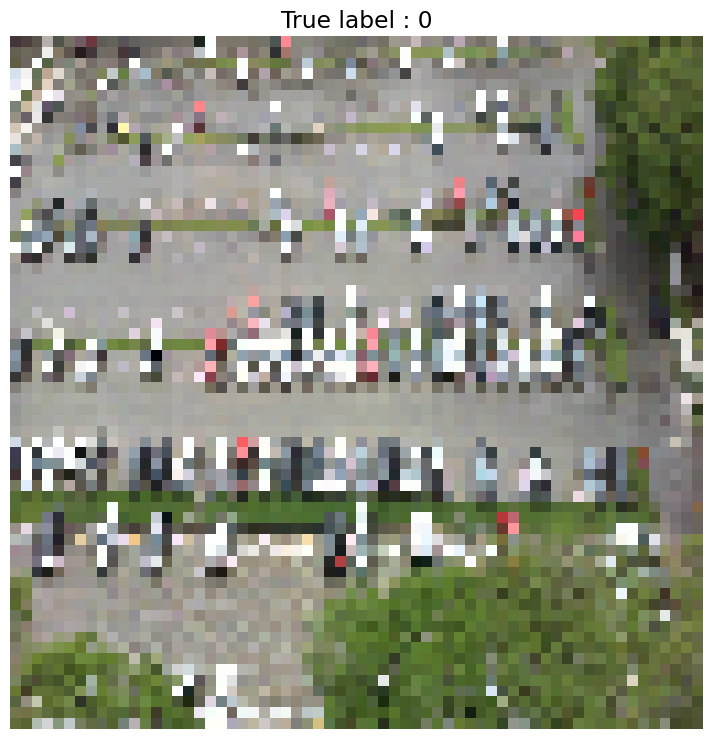

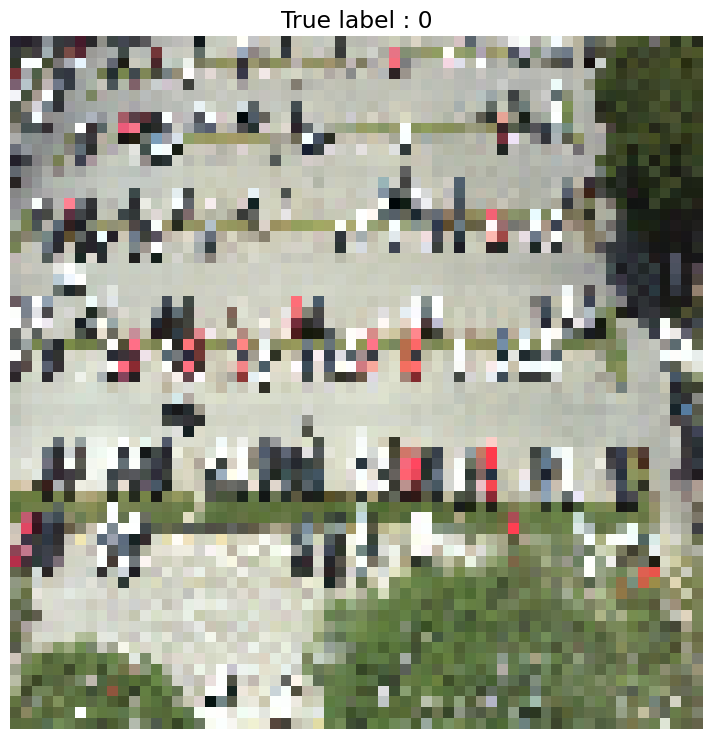

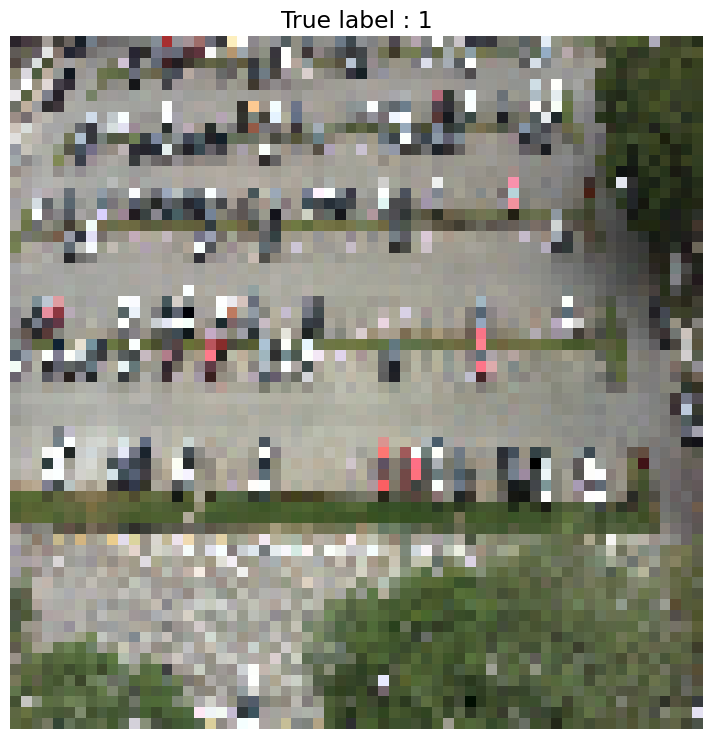

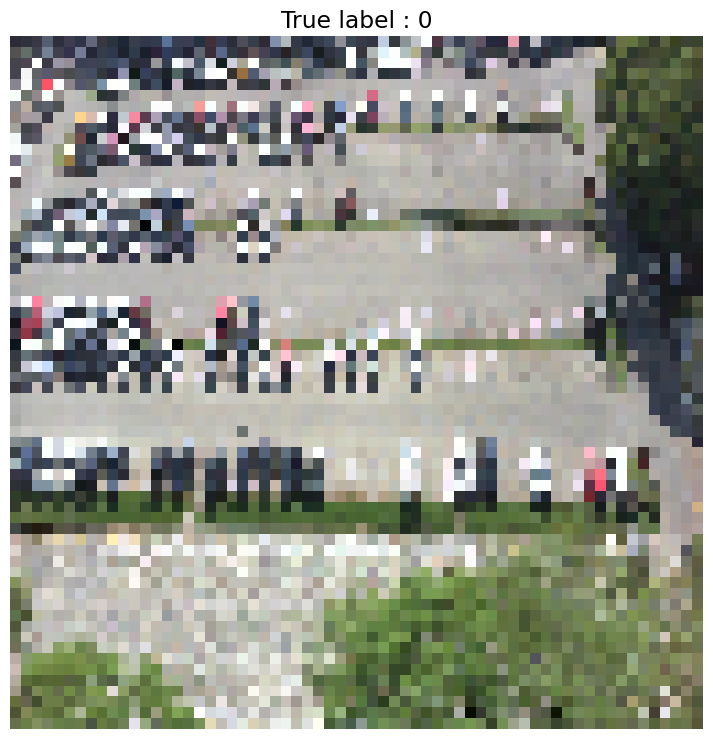

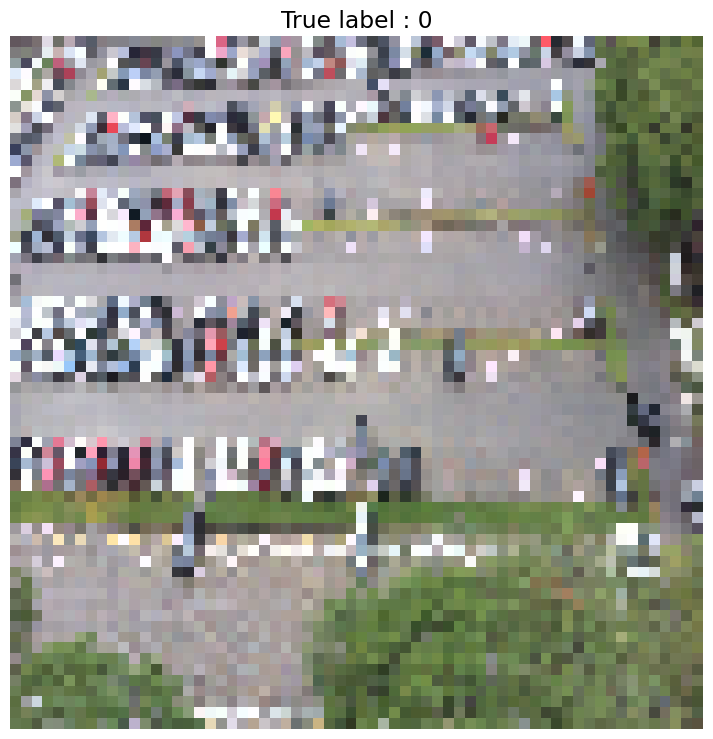

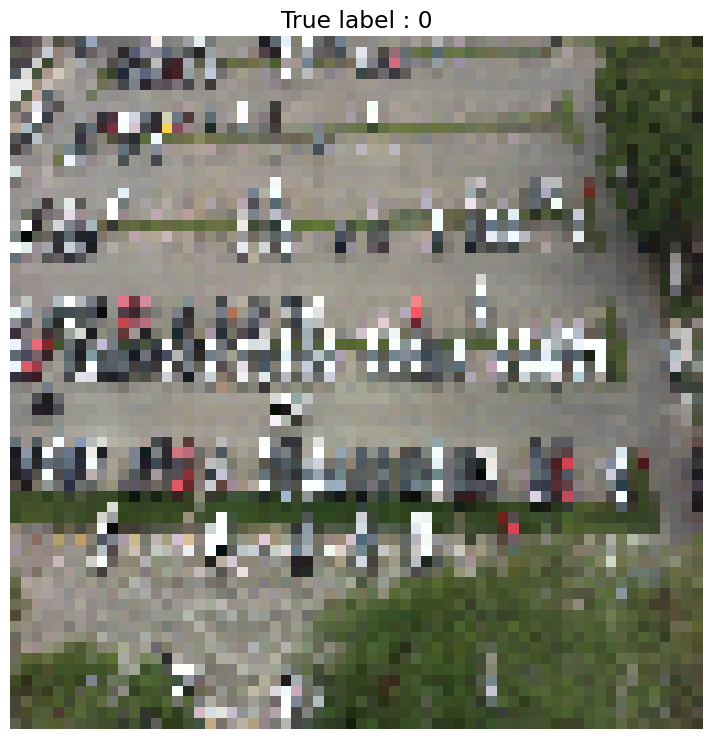

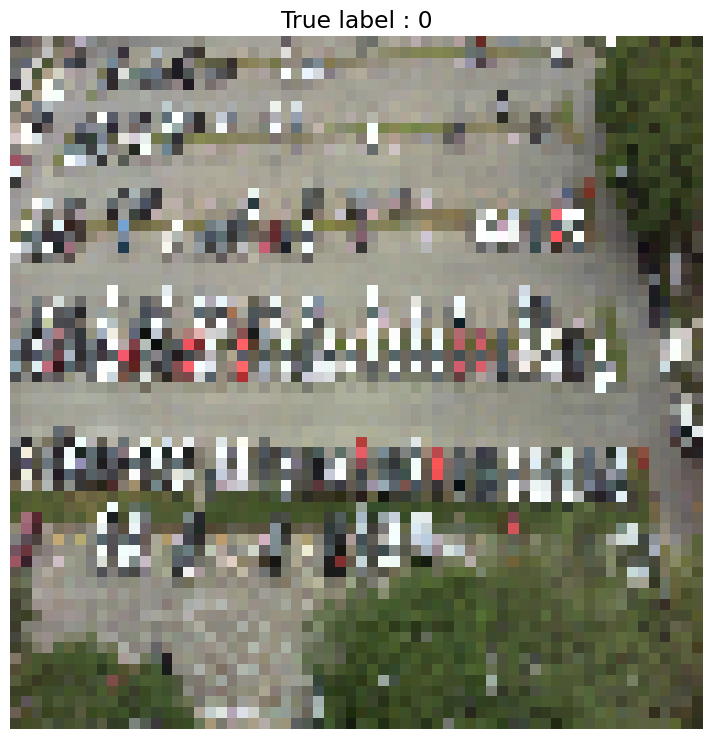

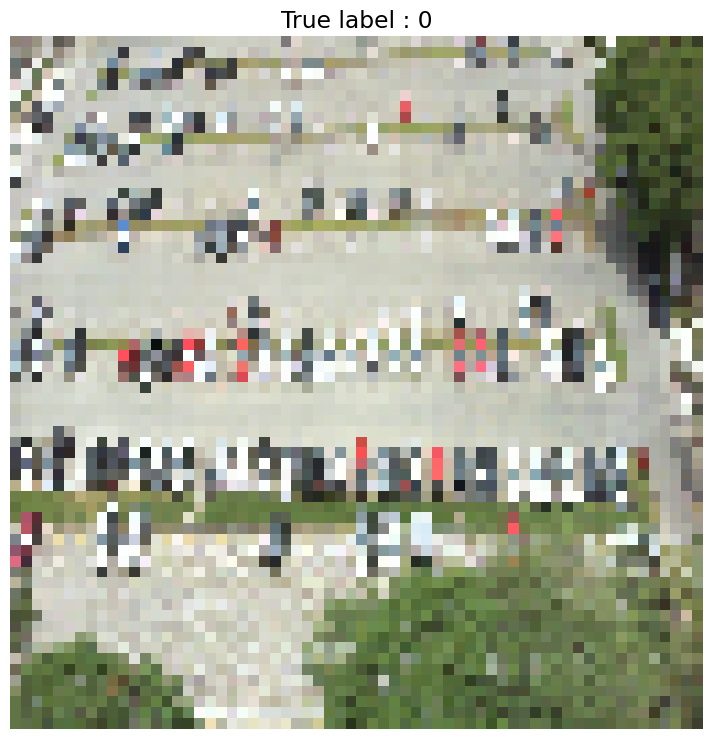

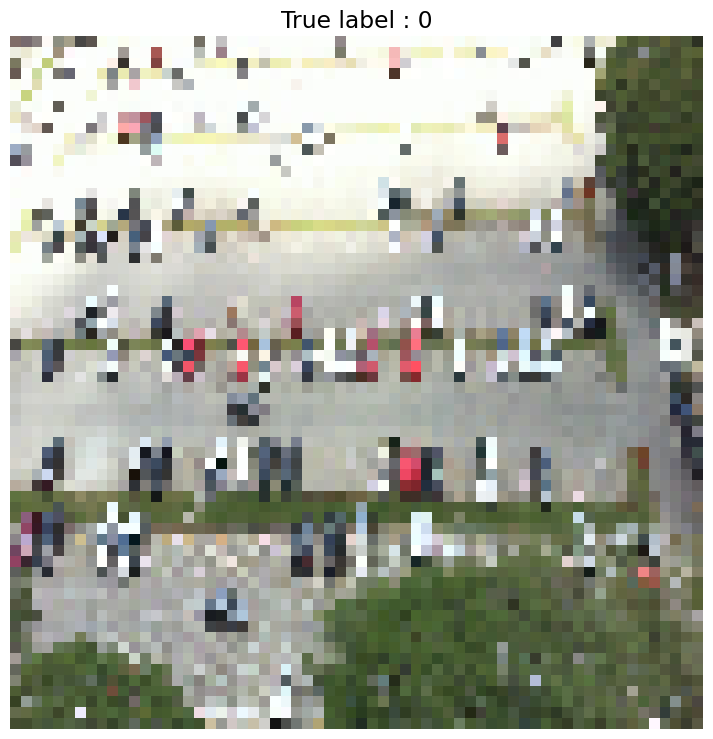

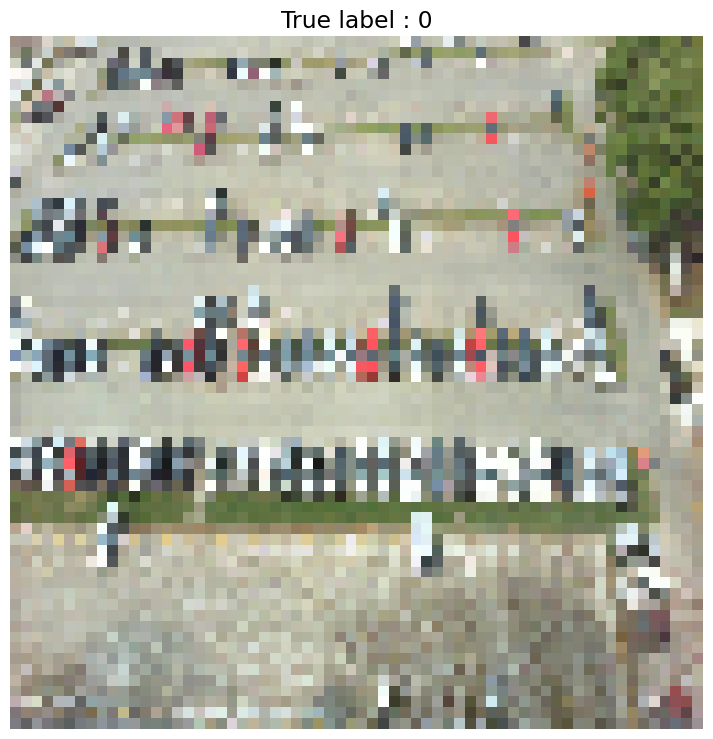

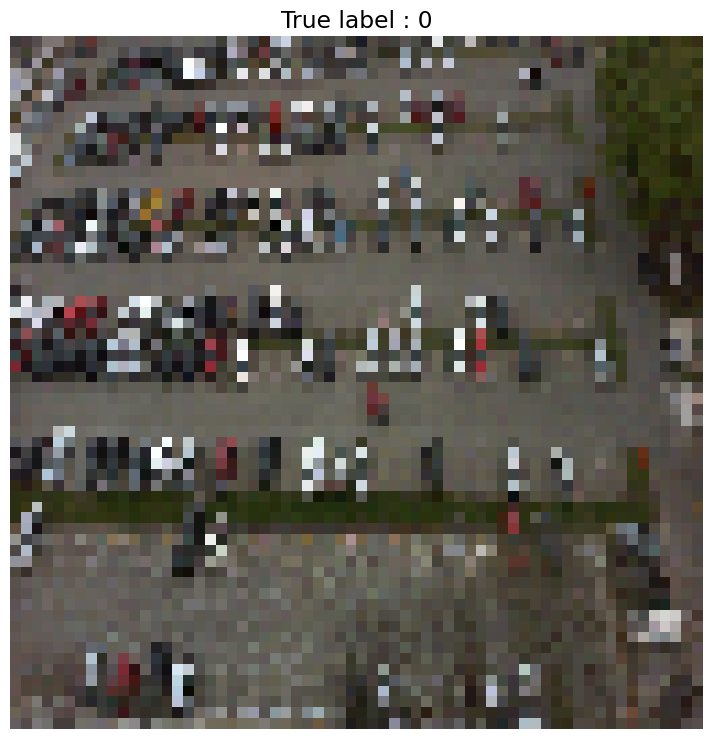

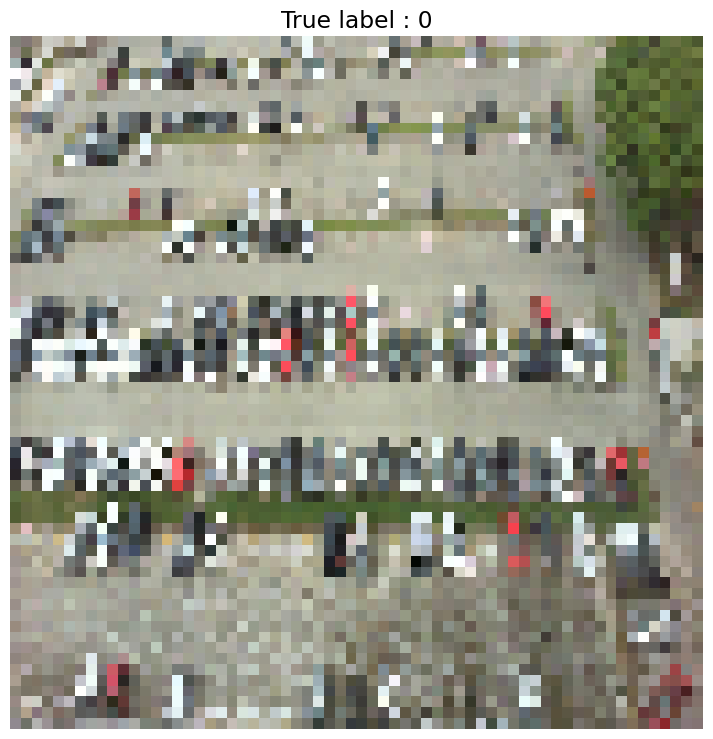

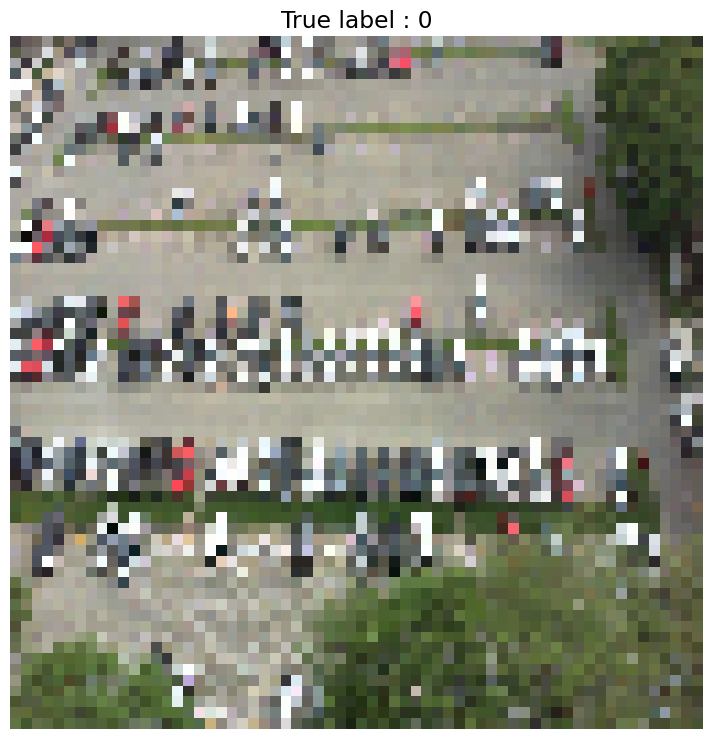

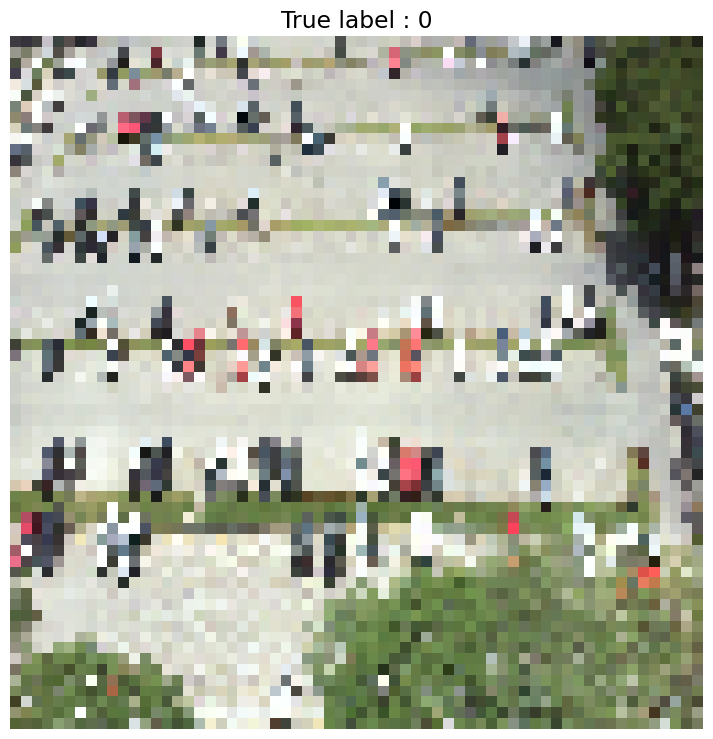

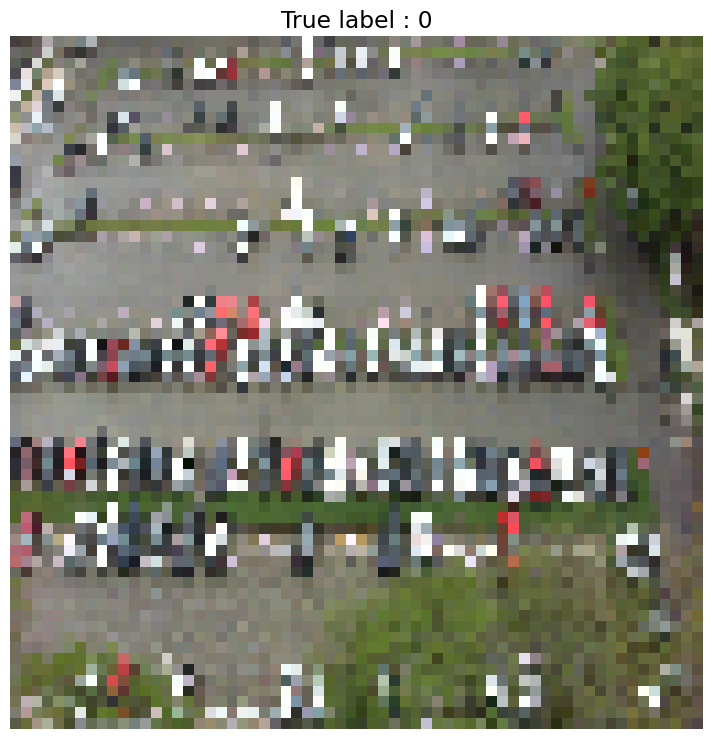

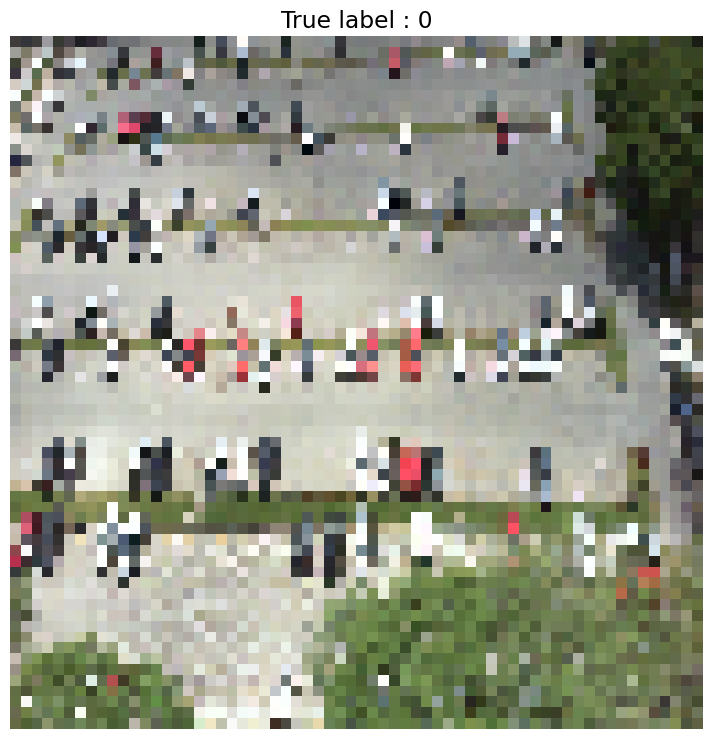

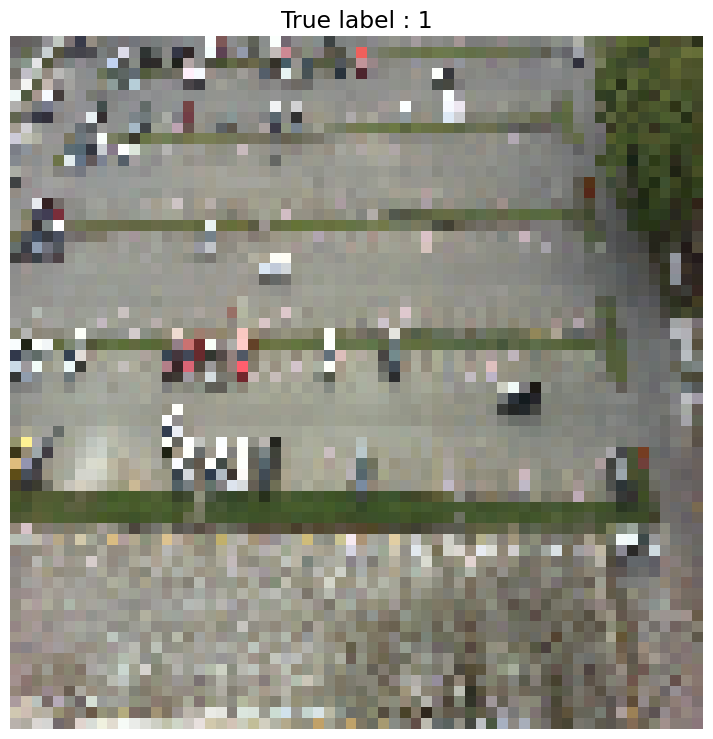

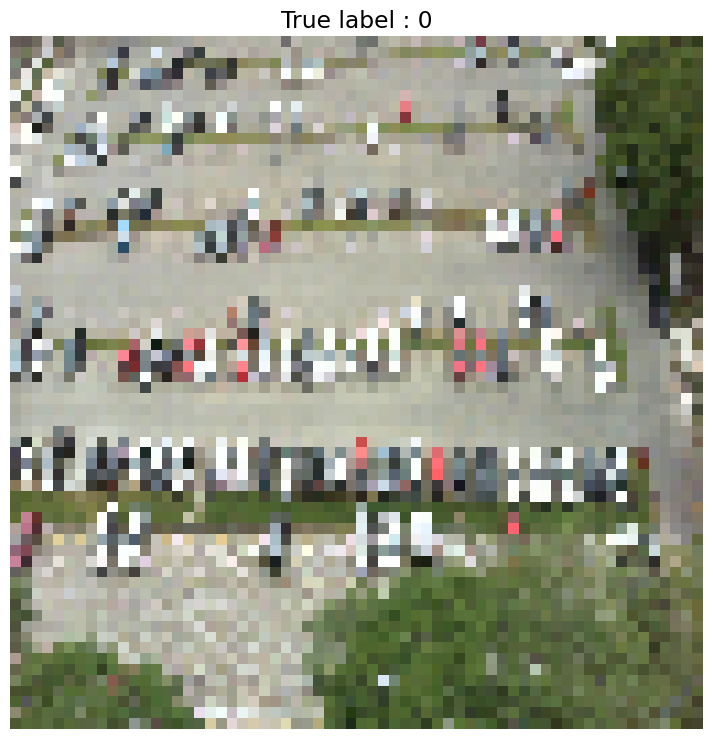

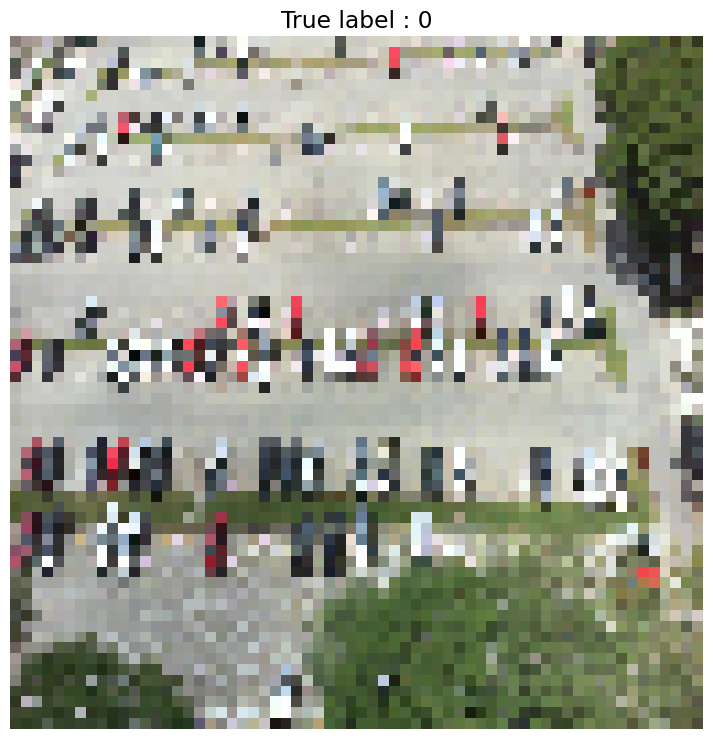

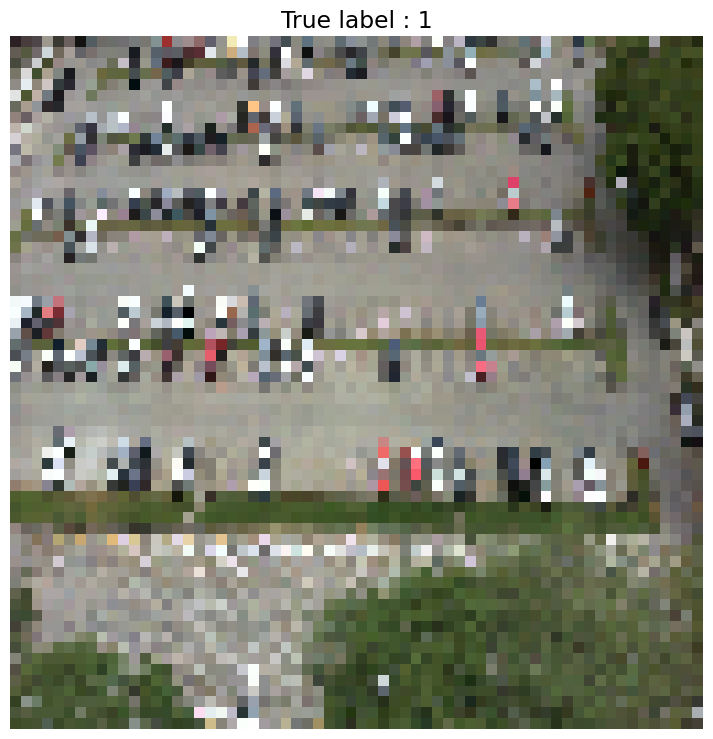

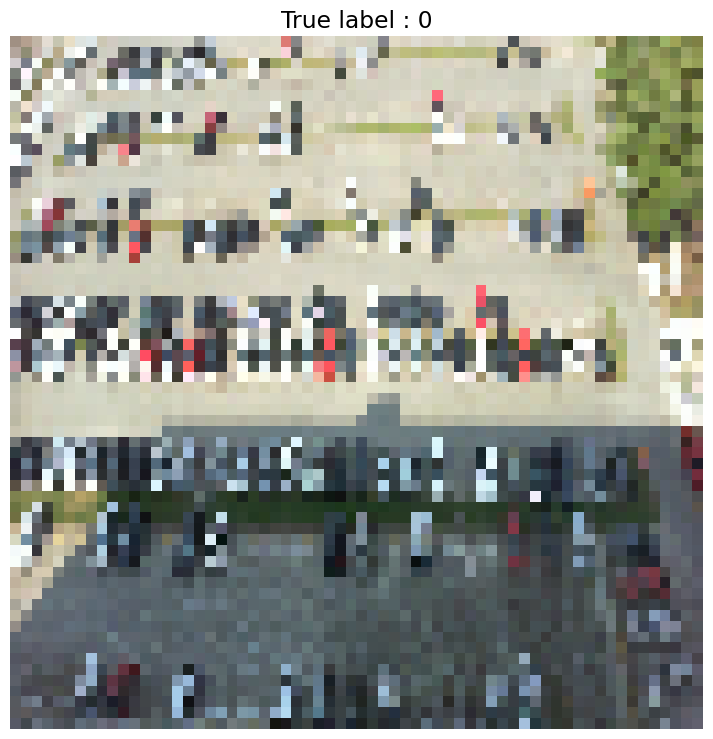

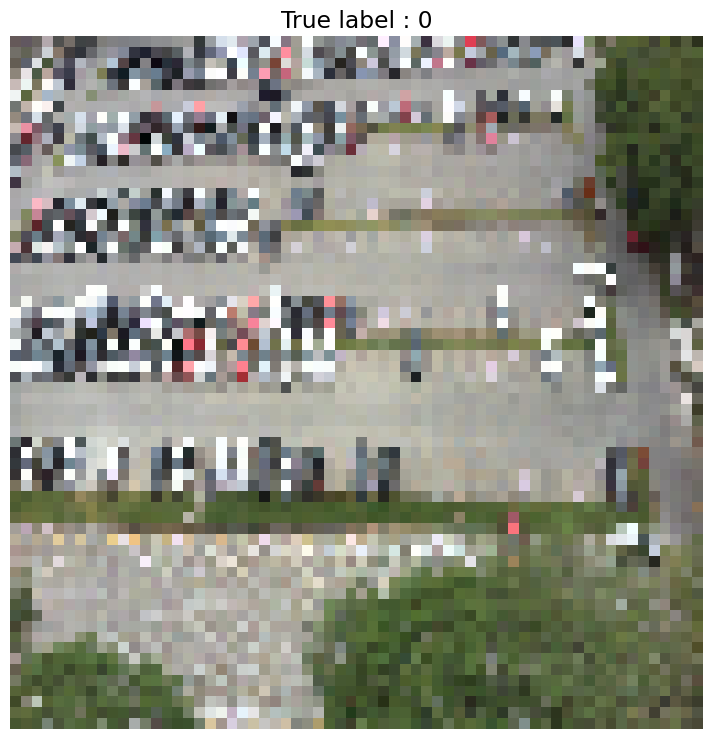

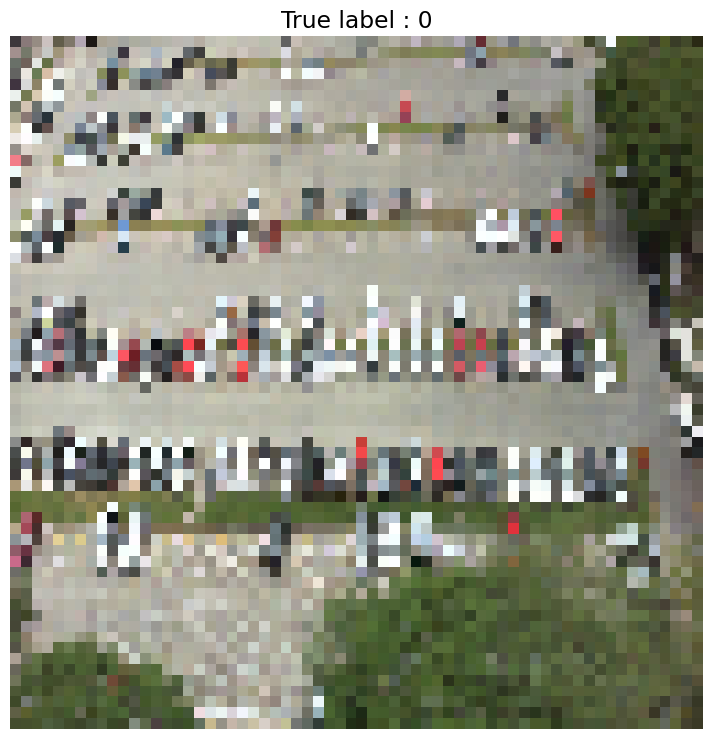

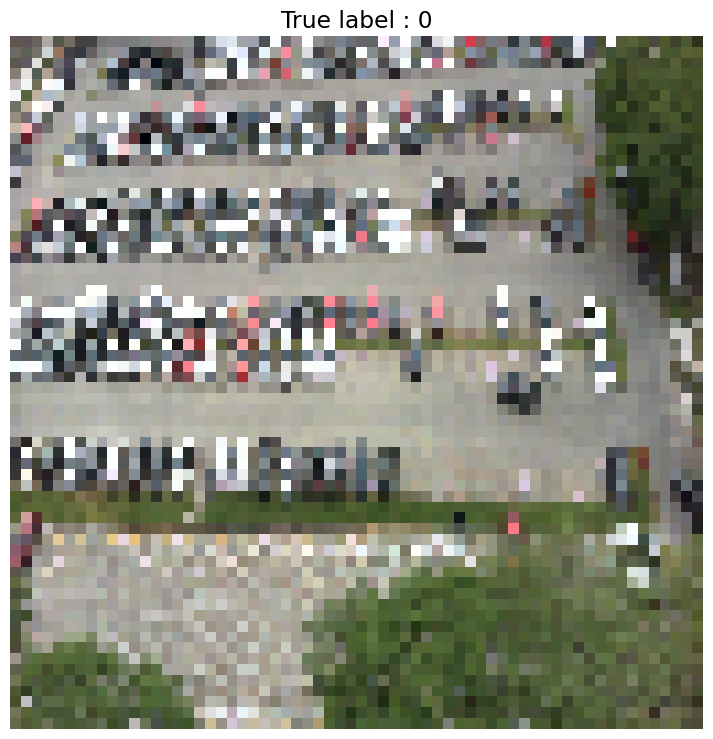

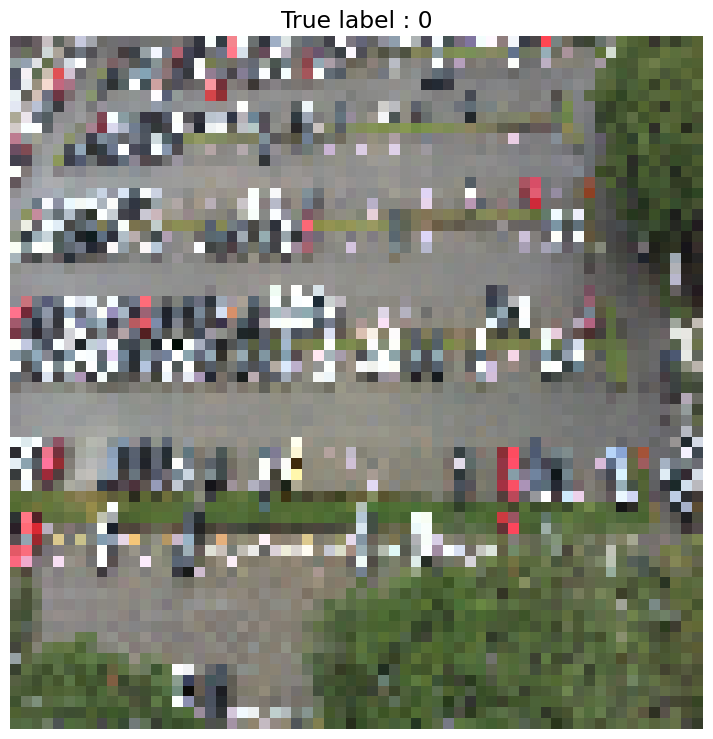

In [ ]:
count = 0
for i in range(len(validation_generator.classes)):
    if i % 100 == 0:
        image , label = validation_generator[int(i / 100)]
    if validation_generator.classes[i] != pred[i]:
        plt.figure()
        plt.imshow(image[i%100])
        plt.title("True label : " + str(int(validation_generator.classes[i])))
        plt.axis("off")
        count = count + 1
    else:
        pass

In [ ]:
print("Out of", len(validation_generator.classes), "validation images" , count , "are predicted wrong")


Out of 791 validation images 64 are predicted wrong


In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred]

In [ ]:
filenames=validation_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [ ]:
def predict_occupancy(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array)
    return prediction

1/1 [==============================] - 0s 84ms/step


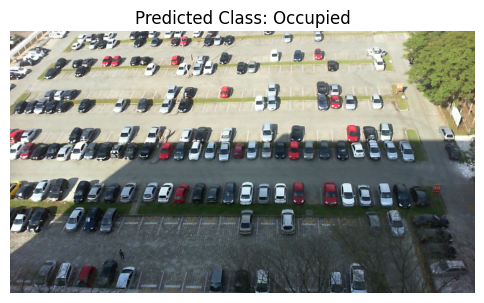

The given image is predicted to be: Occupied


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
test_path = "/content/drive/MyDrive/PKLot/Occupied"
model_path = "/content/drive/MyDrive/savedmodelpath/model1.h5"
model = tf.keras.models.load_model(model_path)
def predict_occupancy(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = tf.expand_dims(img_array, 0)
    prediction = model.predict(img_array)
    return prediction
image_name = "2012-09-11_15_27_08.jpg"
image_file = os.path.join(test_path, image_name)
prediction = predict_occupancy(image_file)
class_names = ['Vacant', 'Occupied']
predicted_class_index = tf.argmax(prediction, axis=1)
predicted_class = class_names[predicted_class_index[0].numpy()]
img = image.load_img(image_file)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
print(f"The given image is predicted to be: {predicted_class}")


Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy: 0.9239027500152588\nValidation Accuracy: 0.9190897345542908')

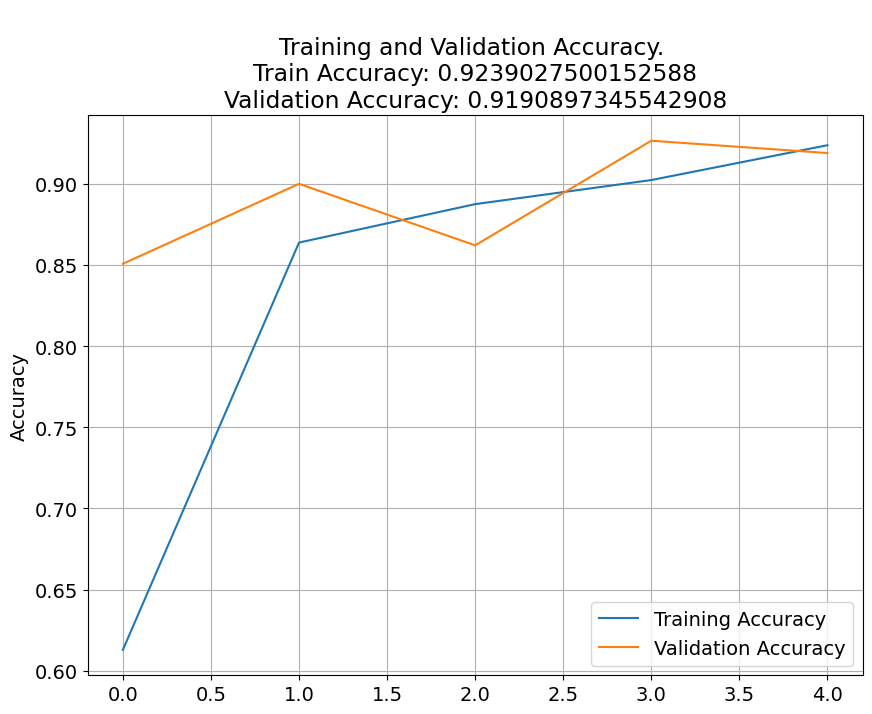

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')